In [21]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
df = pd.read_csv("./df_reduced_feature.csv")
df2 = pd.read_csv("./df_reduced_feature_encoded.csv")

In [23]:
df.head()

,Unnamed: 0,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,0,CON,31,5.047801e+05,6.271510e+05,0,0,0,0,82,...,0,,2,3,9,1,1,1,Normal,0
1,1,INT,60,1.508571e+08,0.000000e+00,0,0,0,0,0,...,0,,57,57,56,56,20,57,Normal,0
2,2,FIN,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,...,0,,3,2,6,1,1,1,Normal,0
3,3,FIN,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,...,1,,5,2,2,2,1,2,Normal,0
4,4,FIN,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,...,0,,7,7,3,2,1,3,Normal,0


In [24]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [25]:
df.head()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,CON,31,5.047801e+05,6.271510e+05,0,0,0,0,82,1424228654,...,0,,2,3,9,1,1,1,Normal,0
1,INT,60,1.508571e+08,0.000000e+00,0,0,0,0,0,1424230503,...,0,,57,57,56,56,20,57,Normal,0
2,FIN,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,1424219965,...,0,,3,2,6,1,1,1,Normal,0
3,FIN,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,1424227838,...,1,,5,2,2,2,1,2,Normal,0
4,FIN,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,1424224020,...,0,,7,7,3,2,1,3,Normal,0


In [26]:
df2.head()

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,2.0,31,5.047801e+05,6.271510e+05,0,0,0,0,82,1424228654,...,0,0.0,2,3,9,1,1,1,8.0,0
1,5.0,60,1.508571e+08,0.000000e+00,0,0,0,0,0,1424230503,...,0,0.0,57,57,56,56,20,57,8.0,0
2,4.0,31,1.930670e+06,1.467602e+07,255,255,3749459648,1621172393,463,1424219965,...,0,0.0,3,2,6,1,1,1,8.0,0
3,4.0,254,4.031583e+03,2.730115e+03,255,255,1595364685,3437994824,59,1424227838,...,1,0.0,5,2,2,2,1,2,8.0,0
4,4.0,31,1.846902e+06,4.032078e+06,255,255,1560901437,3710780746,189,1424224020,...,0,0.0,7,7,3,2,1,3,8.0,0


In [27]:
def getXy():
    X = df2.drop(['Label'], axis=1)
    y = df2["Label"]
    
    return (X,y)

In [28]:
from sklearn.model_selection import train_test_split

def getSplittedXy(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
    return (X_train,X_test ,y_train, y_test, )

In [29]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True, target_names=['No Intrusion', 'Intrusion']))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"\nACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"\nCLASSIFICATION REPORT:\n{clf_report}")
    
    
    print("_________________________________________________________________________________")

    print("\nTESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True, target_names=['No Intrusion', 'Intrusion']))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"\nACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"\nCLASSIFICATION REPORT:\n{clf_report}")

In [30]:
cols = df.columns
cols=cols.drop(['Label'])

In [31]:
cols

Index(['state', 'sttl', 'Sload', 'Dload', 'swin', 'dwin', 'stcpb', 'dtcpb',
       'dmeansz', 'Stime', 'Ltime', 'ct_state_ttl', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'attack_cat'],
      dtype='object')

### Feature Scaling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# from sklearn.metrics import accuracy_score

X,y = getXy()

sc = RobustScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = getSplittedXy(X,y)

In [33]:
df.shape

(92749, 21)

In [34]:
dict_training_accuracy = {}
dict_testing_accuracy = {}
dict_training_time = {}
dict_testing_time = {}

### Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_gaussian = GaussianNB()

In [36]:
start_time = time.time()
nb_gaussian.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["nb_gaussian"] = end_time-start_time

Training time:  0.08794450759887695


In [37]:
start_time = time.time()
y_test_nb_gaussian = nb_gaussian.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["nb_gaussian"] = end_time-start_time

Testing time:  0.03197789192199707


In [38]:
dict_training_accuracy["nb_gaussian"] = nb_gaussian.score(X_train, y_train)
dict_testing_accuracy["nb_gaussian"] = nb_gaussian.score(X_test,y_test)


print("Train score is:", nb_gaussian.score(X_train, y_train))
print("Test score is:",nb_gaussian.score(X_test,y_test))

Train score is: 0.9755252294991067
Test score is: 0.9759928122192273


In [39]:
evaluate(nb_gaussian, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26450  1589]
 [    0 36885]]

ACCURACY SCORE:
0.9755

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.958699  0.975525      0.979350      0.976536
recall         0.943329      1.000000  0.975525      0.971664      0.975525
f1-score       0.970838      0.978914  0.975525      0.974876      0.975426
support    28039.000000  36885.000000  0.975525  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11293   668]
 [    0 15864]]

ACCURACY SCORE:
0.9760

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.959594  0.975993      0.979797      0.976963
recall         0.944152      1.000000  0.975993      0.972076      0.975993
f1-score       0.971274      0.979380  0.975993      0.975327      0.975896
sup

### Decision Tree

#### Decison tree entropy, auto 

In [40]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
d_tree_sqrt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth = 4, max_features='sqrt')

In [41]:
start_time = time.time()
d_tree_sqrt_entropy.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.13503479957580566


In [42]:
start_time = time.time()
y_test_d_tree_sqrt_entropy = d_tree_sqrt_entropy.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["d_tree_sqrt_entropy"] = end_time-start_time

Testing time:  0.0


In [43]:
dict_training_accuracy["d_tree_sqrt_entropy"] = d_tree_sqrt_entropy.score(X_train, y_train)
dict_testing_accuracy["d_tree_sqrt_entropy"] = d_tree_sqrt_entropy.score(X_test,y_test)

print("Train score is:", d_tree_sqrt_entropy.score(X_train, y_train))
print("Test score is:",d_tree_sqrt_entropy.score(X_test,y_test))

Train score is: 0.9943010288953238
Test score is: 0.9950763701707098


In [44]:
evaluate(d_tree_sqrt_entropy, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27672   367]
 [    3 36882]]

ACCURACY SCORE:
0.9943

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999892      0.990147  0.994301      0.995019      0.994356
recall         0.986911      0.999919  0.994301      0.993415      0.994301
f1-score       0.993359      0.995009  0.994301      0.994184      0.994296
support    28039.000000  36885.000000  0.994301  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11825   136]
 [    1 15863]]

ACCURACY SCORE:
0.9951

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999915      0.991499  0.995076      0.995707      0.995117
recall         0.988630      0.999937  0.995076      0.994283      0.995076
f1-score       0.994241      0.995700  0.995076      0.994970      0.995073
sup

#### Decison tree gini, sqrt 

In [289]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
d_tree_sqrt_gini = DecisionTreeClassifier(criterion="gini", max_depth = 2, max_features='sqrt')

In [290]:
start_time = time.time()
d_tree_sqrt_gini.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["d_tree_sqrt_gini"] = end_time-start_time

Training time:  0.02595973014831543


In [291]:
start_time = time.time()
y_test_d_tree_sqrt_gini = d_tree_sqrt_gini.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["d_tree_sqrt_gini"] = end_time-start_time

Testing time:  0.0029926300048828125


In [292]:
dict_training_accuracy["d_tree_sqrt_gini"] = d_tree_sqrt_gini.score(X_train, y_train)
dict_testing_accuracy["d_tree_sqrt_gini"] = d_tree_sqrt_gini.score(X_test,y_test)

print("Train score is:", d_tree_sqrt_gini.score(X_train, y_train))
print("Test score is:",d_tree_sqrt_gini.score(X_test,y_test))

Train score is: 0.9738925512907399
Test score is: 0.9739802336028751


In [49]:
evaluate(d_tree_sqrt_gini, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11961     0]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      1.000000  0.999497      0.999415      0.999497
recall         1.000000      0.999117  0.999497      0.999559      0.999497
f1-score       0.999415      0.999559  0.999497      0.999487      0.999497
sup

#### Decison tree entropy, log2

In [50]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
d_tree_log2_entropy = DecisionTreeClassifier(criterion="entropy", max_depth = 1, max_features='log2')

In [51]:
start_time = time.time()
d_tree_log2_entropy.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["d_tree_log2_entropy"] = end_time-start_time

Training time:  0.023984193801879883


In [52]:
start_time = time.time()
Y_test_pred2 = d_tree_log2_entropy.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["d_tree_log2_entropy"] = end_time-start_time

Testing time:  0.00799417495727539


In [53]:
dict_training_accuracy["d_tree_log2_entropy"] = d_tree_log2_entropy.score(X_train, y_train)
dict_testing_accuracy["d_tree_log2_entropy"] = d_tree_log2_entropy.score(X_test,y_test)

print("Train score is:", d_tree_log2_entropy.score(X_train, y_train))
print("Test score is:",d_tree_log2_entropy.score(X_test,y_test))

Train score is: 0.8340983303554925
Test score is: 0.8314106019766397


In [54]:
evaluate(d_tree_log2_entropy, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26696  1343]
 [ 9428 27457]]

ACCURACY SCORE:
0.8341

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.739010      0.953368  0.834098      0.846189      0.860792
recall         0.952102      0.744395  0.834098      0.848249      0.834098
f1-score       0.832131      0.836020  0.834098      0.834076      0.834341
support    28039.000000  36885.000000  0.834098  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11408   553]
 [ 4138 11726]]

ACCURACY SCORE:
0.8314

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.733822      0.954964  0.831411      0.844393      0.859903
recall         0.953766      0.739158  0.831411      0.846462      0.831411
f1-score       0.829462      0.833316  0.831411      0.831389      0.831659
sup

#### Decison tree gini, log2

In [55]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
d_tree_log2_gini = DecisionTreeClassifier(criterion="gini", max_depth = 1, max_features='log2')

In [56]:
start_time = time.time()
d_tree_log2_gini.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["d_tree_log2_gini"] = end_time-start_time

Training time:  0.024019241333007812


In [57]:
start_time = time.time()
y_test_d_tree_log2_gini = d_tree_log2_gini.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["d_tree_log2_gini"] = end_time-start_time

Testing time:  0.007967233657836914


In [58]:
dict_training_accuracy["d_tree_log2_gini"] = d_tree_log2_gini.score(X_train, y_train)
dict_testing_accuracy["d_tree_log2_gini"] = d_tree_log2_gini.score(X_test,y_test)

print("Train score is:", d_tree_log2_gini.score(X_train, y_train))
print("Test score is:",d_tree_log2_gini.score(X_test,y_test))

Train score is: 0.9928685848068511
Test score is: 0.9933513027852651


In [59]:
evaluate(d_tree_log2_gini, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27625   414]
 [   49 36836]]

ACCURACY SCORE:
0.9929

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998229      0.988886  0.992869      0.993558      0.992921
recall         0.985235      0.998672  0.992869      0.991953      0.992869
f1-score       0.991690      0.993755  0.992869      0.992722      0.992863
support    28039.000000  36885.000000  0.992869  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11796   165]
 [   20 15844]]

ACCURACY SCORE:
0.9934

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998307      0.989693  0.993351      0.994000      0.993396
recall         0.986205      0.998739  0.993351      0.992472      0.993351
f1-score       0.992219      0.994196  0.993351      0.993208      0.993346
sup

### Support Vector Machine

#### SVM rbf 

In [60]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf',gamma = 'scale',)

In [61]:
start_time = time.time()
svm_rbf.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["svm_rbf"] = end_time-start_time

Training time:  4.1639404296875


In [62]:
start_time = time.time()
y_test_svm_rbf = svm_rbf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["svm_poly"] = end_time-start_time

Testing time:  2.486793041229248


In [63]:
dict_training_accuracy["svm_rbf"] = svm_rbf.score(X_train, y_train)
dict_testing_accuracy["svm_rbf"] = svm_rbf.score(X_test,y_test)

print("Train score is:", svm_rbf.score(X_train, y_train))
print("Test score is:", svm_rbf.score(X_test,y_test))

Train score is: 0.999537921261783
Test score is: 0.999424977538185


In [64]:
evaluate(svm_rbf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28034     5]
 [   25 36860]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999109      0.999864  0.999538      0.999487      0.999538
recall         0.999822      0.999322  0.999538      0.999572      0.999538
f1-score       0.999465      0.999593  0.999538      0.999529      0.999538
support    28039.000000  36885.000000  0.999538  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11958     3]
 [   13 15851]]

ACCURACY SCORE:
0.9994

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998914      0.999811  0.999425      0.999362      0.999425
recall         0.999749      0.999181  0.999425      0.999465      0.999425
f1-score       0.999331      0.999496  0.999425      0.999413      0.999425
sup

#### SVM poly

In [65]:
svm_poly = SVC(kernel='poly', gamma='scale', degree=5)

In [66]:
start_time = time.time()
svm_poly.fit(X_train, y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

dict_training_time["svm_poly"] = end_time-start_time

Training time:  84.23038411140442


In [67]:
start_time = time.time()
y_test_svm_poly = svm_poly.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["svm_poly"] = end_time-start_time

Testing time:  17.181707620620728


In [68]:
dict_training_accuracy["svm_poly"] = svm_rbf.score(X_train, y_train)
dict_testing_accuracy["svm_poly"] = svm_rbf.score(X_test,y_test)

print("Train score is:", svm_poly.score(X_train, y_train))
print("Test score is:", svm_poly.score(X_test,y_test))

Train score is: 0.8704947323023843
Test score is: 0.8689667565139263


In [69]:
evaluate(svm_poly, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[19632  8407]
 [    1 36884]]

ACCURACY SCORE:
0.8705

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999949      0.814378  0.870495      0.907164      0.894521
recall         0.700168      0.999973  0.870495      0.850070      0.870495
f1-score       0.823628      0.897683  0.870495      0.860656      0.865701
support    28039.000000  36885.000000  0.870495  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[ 8318  3643]
 [    3 15861]]

ACCURACY SCORE:
0.8690

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999639      0.813218  0.868967      0.906429      0.893354
recall         0.695427      0.999811  0.868967      0.847619      0.868967
f1-score       0.820235      0.896912  0.868967      0.858574      0.863951
sup

#### svm linear

In [297]:
svm_linear = SVC(kernel='linear', gamma='scale')

In [298]:

start_time = time.time()
svm_linear.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["svm_linear"] = end_time-start_time


Training time:  0.9653904438018799


In [299]:
start_time = time.time()
y_test_svm_linear = svm_linear.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["svm_linear"] = end_time-start_time


Testing time:  0.10671353340148926


In [301]:
dict_training_accuracy["svm_linear"] = svm_linear.score(X_train, y_train)
dict_testing_accuracy["svm_linear"] = svm_linear.score(X_test,y_test)

print("Train score is:", svm_linear.score(X_train, y_train))
print("Test score is:", svm_linear.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994968553459119


In [74]:
evaluate(svm_linear, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11961     0]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      1.000000  0.999497      0.999415      0.999497
recall         1.000000      0.999117  0.999497      0.999559      0.999497
f1-score       0.999415      0.999559  0.999497      0.999487      0.999497
sup

#### svm sigmoid

In [75]:
svm_sigmoid = SVC(kernel='sigmoid', gamma='scale')

In [76]:
start_time = time.time()
svm_sigmoid.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["svm_sigmoid"] = end_time-start_time


Training time:  24.630440950393677


In [77]:
start_time = time.time()
y_test_svm_sigmoid = svm_sigmoid.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["svm_sigmoid"] = end_time-start_time


Testing time:  5.038311958312988


In [78]:
dict_training_accuracy["svm_sigmoid"] = svm_sigmoid.score(X_train, y_train)
dict_testing_accuracy["svm_sigmoid"] = svm_sigmoid.score(X_test,y_test)

print("Train score is:", svm_sigmoid.score(X_train, y_train))
print("Test score is:", svm_sigmoid.score(X_test,y_test))

Train score is: 0.9218470827428994
Test score is: 0.9179874213836478


In [79]:
evaluate(svm_sigmoid, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[25516  2523]
 [ 2551 34334]]

ACCURACY SCORE:
0.9218

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.909110      0.931546  0.921847      0.920328      0.921857
recall         0.910018      0.930839  0.921847      0.920429      0.921847
f1-score       0.909564      0.931193  0.921847      0.920378      0.921852
support    28039.000000  36885.000000  0.921847  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[10865  1096]
 [ 1186 14678]]

ACCURACY SCORE:
0.9180

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.901585      0.930519  0.917987      0.916052      0.918081
recall         0.908369      0.925240  0.917987      0.916804      0.917987
f1-score       0.904964      0.927872  0.917987      0.916418      0.918024
sup

### Logistic Regression

#### logistic reg , l1

In [80]:
from sklearn.linear_model import LogisticRegression
log_reg_l1 = LogisticRegression(max_iter=100000, solver='liblinear', penalty='l1' )

In [81]:
start_time = time.time()
log_reg_l1.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_l1"] = end_time-start_time

Training time:  0.4409925937652588


In [82]:
start_time = time.time()
y_test_log_reg_l1 = log_reg_l1.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["log_reg_l1"] = end_time-start_time

Testing time:  1.8200562000274658


In [83]:
dict_training_accuracy["log_reg_l1"] =  log_reg_l1.score(X_train, y_train)
dict_testing_accuracy["log_reg_l1"] =  log_reg_l1.score(X_test, y_test)

print("Train score is:", log_reg_l1.score(X_train, y_train))
print("Test score is:",log_reg_l1.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994609164420485


In [84]:
evaluate(log_reg_l1, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11960     1]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      0.999937  0.999461      0.999384      0.999461
recall         0.999916      0.999117  0.999461      0.999517      0.999461
f1-score       0.999373      0.999527  0.999461      0.999450      0.999461
sup

#### logistic reg , l2

In [85]:
from sklearn.linear_model import LogisticRegression
log_reg_l2 = LogisticRegression(max_iter=100000, solver='liblinear', penalty='l2' )

In [86]:
start_time = time.time()
log_reg_l2.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_l2"] = end_time-start_time

Training time:  0.8993227481842041


In [87]:
start_time = time.time()
y_test_log_reg_l2 = log_reg_l1.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["log_reg_l2"] = end_time-start_time

Testing time:  0.0


In [88]:
dict_training_accuracy["log_reg_l2"] =  log_reg_l2.score(X_train, y_train)
dict_testing_accuracy["log_reg_l2"] =  log_reg_l2.score(X_test, y_test)

print("Train score is:", log_reg_l2.score(X_train, y_train))
print("Test score is:",log_reg_l2.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994609164420485


In [89]:
evaluate(log_reg_l2, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11960     1]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      0.999937  0.999461      0.999384      0.999461
recall         0.999916      0.999117  0.999461      0.999517      0.999461
f1-score       0.999373      0.999527  0.999461      0.999450      0.999461
sup

### Feature Selection Algorithms

#### Find important features with Random Forest model

In [90]:
from sklearn.ensemble import RandomForestClassifier

rfc_imp = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=2, max_features='log2', max_samples=10 )

rfc_imp.fit(X_train, y_train)

y_test_rfc_imp = rfc_imp.predict(X_test)

print(rfc_imp.score(X_train, y_train))
print(rfc_imp.score(X_test, y_test))


0.9750015402624608
0.9753459119496856


In [91]:
feature_scores = pd.Series(rfc_imp.feature_importances_, index=cols).sort_values(ascending=False)

feature_scores

sttl                0.162173
ct_state_ttl        0.156598
attack_cat          0.145963
Dload               0.111802
dmeansz             0.080746
Ltime               0.044045
Stime               0.041332
Sload               0.041093
ct_ftp_cmd          0.039581
state               0.035069
stcpb               0.022026
ct_srv_dst          0.018936
ct_dst_src_ltm      0.018104
ct_dst_sport_ltm    0.015467
dtcpb               0.015050
ct_src_ ltm         0.014657
ct_src_dport_ltm    0.013027
dwin                0.009729
ct_srv_src          0.008549
swin                0.006054
dtype: float64

In [92]:
X2, y2 = getXy()

sc = MinMaxScaler()
# X2 = sc.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = getSplittedXy(X2,y2)

In [93]:
X2_train

,state,sttl,Sload,Dload,swin,dwin,stcpb,dtcpb,dmeansz,Stime,Ltime,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
92461,5.0,254,5.066666e+07,0.00000,0,0,0,0,0,1424231086,1424231086,2,0.0,35,35,18,18,18,35,7.0
7468,4.0,31,5.861279e+05,26227.65430,255,255,946480627,1814580375,53,1421959276,1421959276,0,1.0,3,3,7,1,1,3,8.0
86965,5.0,254,4.560000e+08,0.00000,0,0,0,0,0,1424230536,1424230536,2,0.0,36,36,35,35,20,36,7.0
58761,5.0,254,5.700000e+07,0.00000,0,0,0,0,0,1424224489,1424224489,2,0.0,28,28,17,17,8,28,7.0
8037,2.0,31,5.242370e+05,639138.25000,0,0,0,0,89,1424223693,1424223693,0,0.0,1,3,2,1,1,2,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,4.0,31,2.665657e+04,34020.00781,255,255,2383752027,2388927382,69,1424226745,1424226746,0,2.0,1,1,4,1,1,4,8.0
54886,5.0,254,4.560000e+07,0.00000,0,0,0,0,0,1424223920,1424223920,2,0.0,19,19,8,8,8,19,7.0
76820,5.0,254,8.888889e+07,0.00000,0,0,0,0,0,1424230223,1424230223,2,0.0,5,5,1,1,1,7,6.0
860,4.0,31,1.235393e+04,75861.35938,255,255,800072949,2951237302,565,1424229309,1424229310,0,0.0,1,2,7,1,1,4,8.0


##### Dropping the columns having very low importance

In [94]:
X2_train = X2_train.drop(['swin', 'dwin'], axis=1)

X2_test = X2_test.drop(['swin', 'dwin'], axis=1)

In [95]:
rfc_imp = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=2, max_features='log2', max_samples=9)

In [96]:
start_time = time.time()
rfc_imp.fit(X2_train, y2_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["rfc_imp"] = end_time-start_time

Training time:  5.045454978942871


In [97]:
X2_train.shape

(64924, 18)

In [98]:
X2_test.shape

(27825, 18)

In [99]:
start_time = time.time()
y_test_rfc_imp = rfc_imp.predict(X2_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["rfc_imp"] = end_time-start_time


Testing time:  1.2958440780639648


In [100]:

dict_training_accuracy["rfc_imp"] =  rfc_imp.score(X2_train, y2_train)
dict_testing_accuracy["rfc_imp"] =  rfc_imp.score(X2_test, y2_test)

print("Train score is:", rfc_imp.score(X2_train, y2_train))
print("Test score is:",rfc_imp.score(X2_test,y2_test))

Train score is: 0.9754020085022488
Test score is: 0.9757412398921833


In [101]:
evaluate(rfc_imp, X2_train, X2_test, y2_train, y2_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26446  1593]
 [    4 36881]]

ACCURACY SCORE:
0.9754

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999849      0.958595  0.975402      0.979222      0.976412
recall         0.943186      0.999892  0.975402      0.971539      0.975402
f1-score       0.970691      0.978808  0.975402      0.974750      0.975303
support    28039.000000  36885.000000  0.975402  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11290   671]
 [    4 15860]]

ACCURACY SCORE:
0.9757

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999646      0.959410  0.975741      0.979528      0.976706
recall         0.943901      0.999748  0.975741      0.971824      0.975741
f1-score       0.970974      0.979163  0.975741      0.975069      0.975643
sup

#### Logistic regression with lasso regularization and recursive feature elimination

In [102]:
from sklearn.feature_selection import RFE
log_reg = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=42)
log_reg_rfe = RFE(log_reg, n_features_to_select=11)


In [103]:
start_time = time.time()
log_reg_rfe.fit(X_train,y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_rfe"] = end_time-start_time

Training time:  1.757613182067871


In [104]:
start_time = time.time()
y_test_log_reg_rfe = log_reg_rfe.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["log_reg_rfe"] = end_time-start_time

Testing time:  0.007965803146362305


In [105]:
dict_training_accuracy["log_reg_rfe"] =  log_reg_rfe.score(X_train, y_train)
dict_testing_accuracy["log_reg_rfe"] =  log_reg_rfe.score(X_test, y_test)

print("Train score is:", log_reg_rfe.score(X_train, y_train))
print("Test score is:",log_reg_rfe.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994968553459119


In [106]:
evaluate(log_reg_rfe, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11961     0]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      1.000000  0.999497      0.999415      0.999497
recall         1.000000      0.999117  0.999497      0.999559      0.999497
f1-score       0.999415      0.999559  0.999497      0.999487      0.999497
sup

#### Logistic regression with lasso regularization and forward feature elimination

In [107]:
from mlxtend.feature_selection import SequentialFeatureSelector
log_reg = LogisticRegression(max_iter=100000)
log_reg_ffe = SequentialFeatureSelector (log_reg, k_features= 11, forward = True)

X1, y1 = getXy()
X1_train, X1_test, y1_train, y1_test = getSplittedXy(X1,y1)

In [108]:
start_time = time.time()
log_reg_ffe.fit(X1_train, y1_train)
features =list(log_reg_ffe.k_feature_names_)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_ffe"] = end_time-start_time

Training time:  373.75970244407654


In [109]:
features

['state',
 'sttl',
 'swin',
 'dwin',
 'dmeansz',
 'ct_state_ttl',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_src_dport_ltm',
 'attack_cat']

In [110]:

start_time = time.time()
log_reg.fit(X1_train[features], y1_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_ffe"] = end_time-start_time

Training time:  5.420334339141846


In [111]:
start_time = time.time()
y_test_log_reg_ffe = log_reg.predict(X1_test[features])
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["log_reg_ffe"] = end_time-start_time

Testing time:  0.0


In [112]:
dict_training_accuracy["log_reg_ffe"] =  log_reg.score(X1_train[features], y1_train)
dict_testing_accuracy["log_reg_ffe"] =  log_reg.score(X1_test[features], y1_test)

print("Train score is:", log_reg.score(X1_train[features], y1_train))
print("Test score is:",log_reg.score(X1_test[features],y1_test))

Train score is: 0.999599531760212
Test score is: 0.9994609164420485


##### SequentialFeatureSelector has no method to predict so classification report and confusion matrix is not printed 

#### Logistic regression with lasso regularization and backward feature elimination

In [113]:
from mlxtend.feature_selection import SequentialFeatureSelector
log_reg = LogisticRegression(max_iter=100000)
log_reg_bfe = SequentialFeatureSelector (log_reg, k_features= 11, forward = False)

X1, y1 = getXy()
X1_train, X1_test, y1_train, y1_test = getSplittedXy(X1,y1)

In [114]:
start_time = time.time()
log_reg_bfe.fit(X1_train, y1_train)
features =list(log_reg_bfe.k_feature_names_)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_bfe"] = end_time-start_time

Training time:  127.64345383644104


In [115]:
features

['state',
 'sttl',
 'Sload',
 'Dload',
 'swin',
 'dwin',
 'stcpb',
 'dmeansz',
 'Stime',
 'Ltime',
 'ct_state_ttl']

In [116]:

start_time = time.time()
log_reg.fit(X1_train[features], y1_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["log_reg_bfe"] = end_time-start_time

Training time:  0.2062087059020996


In [117]:
start_time = time.time()
y_test_log_reg_bfe = log_reg.predict(X1_test[features])
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["log_reg_bfe"] = end_time-start_time

Testing time:  0.007790088653564453


In [118]:
dict_training_accuracy["log_reg_bfe"] =  log_reg.score(X1_train[features], y1_train)
dict_testing_accuracy["log_reg_bfe"] =  log_reg.score(X1_test[features], y1_test)

print("Train score is:", log_reg.score(X1_train[features], y1_train))
print("Test score is:",log_reg.score(X1_test[features],y1_test))

Train score is: 0.8794898650730084
Test score is: 0.8776999101527403


##### SequentialFeatureSelector has no method to predict so classification report and confusion matrix is not printed 

In [119]:
# # infinite time loop

# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# log_reg = LogisticRegression()

# efs1 = EFS(log_reg, 
#            min_features=1,
#            max_features=11,
#            scoring='accuracy',
#            print_progress=True,
#            cv=5)

# efs1 = efs1.fit(X, y)

In [120]:
# print('Best accuracy score: %.2f' % efs1.best_score_)
# print('Best subset (indices):', efs1.best_idx_)
# print('Best subset (corresponding names):', efs1.best_feature_names_)

In [121]:
dict_training_accuracy

{'nb_gaussian': 0.9755252294991067,
 'd_tree_sqrt_entropy': 0.9943010288953238,
 'd_tree_sqrt_gini': 0.999599531760212,
 'd_tree_log2_entropy': 0.8340983303554925,
 'd_tree_log2_gini': 0.9928685848068511,
 'svm_rbf': 0.999537921261783,
 'svm_poly': 0.999537921261783,
 'svm_linear': 0.999599531760212,
 'svm_sigmoid': 0.9218470827428994,
 'log_reg_l1': 0.999599531760212,
 'log_reg_l2': 0.999599531760212,
 'rfc_imp': 0.9754020085022488,
 'log_reg_rfe': 0.999599531760212,
 'log_reg_ffe': 0.999599531760212,
 'log_reg_bfe': 0.8794898650730084}

In [122]:
dict_testing_accuracy

{'nb_gaussian': 0.9759928122192273,
 'd_tree_sqrt_entropy': 0.9950763701707098,
 'd_tree_sqrt_gini': 0.9994968553459119,
 'd_tree_log2_entropy': 0.8314106019766397,
 'd_tree_log2_gini': 0.9933513027852651,
 'svm_rbf': 0.999424977538185,
 'svm_poly': 0.999424977538185,
 'svm_linear': 0.9994968553459119,
 'svm_sigmoid': 0.9179874213836478,
 'log_reg_l1': 0.9994609164420485,
 'log_reg_l2': 0.9994609164420485,
 'rfc_imp': 0.9757412398921833,
 'log_reg_rfe': 0.9994968553459119,
 'log_reg_ffe': 0.9994609164420485,
 'log_reg_bfe': 0.8776999101527403}

In [123]:
dict_training_time

{'nb_gaussian': 0.08794450759887695,
 'd_tree_sqrt_gini': 0.03200864791870117,
 'd_tree_log2_entropy': 0.023984193801879883,
 'd_tree_log2_gini': 0.024019241333007812,
 'svm_rbf': 4.1639404296875,
 'svm_poly': 84.23038411140442,
 'svm_linear': 1.2797520160675049,
 'svm_sigmoid': 24.630440950393677,
 'log_reg_l1': 0.4409925937652588,
 'log_reg_l2': 0.8993227481842041,
 'rfc_imp': 5.045454978942871,
 'log_reg_rfe': 1.757613182067871,
 'log_reg_ffe': 5.420334339141846,
 'log_reg_bfe': 0.2062087059020996}

In [124]:
dict_testing_time

{'nb_gaussian': 0.03197789192199707,
 'd_tree_sqrt_entropy': 0.0,
 'd_tree_sqrt_gini': 0.007962703704833984,
 'd_tree_log2_entropy': 0.00799417495727539,
 'd_tree_log2_gini': 0.007967233657836914,
 'svm_poly': 17.181707620620728,
 'svm_linear': 0.15091943740844727,
 'svm_sigmoid': 5.038311958312988,
 'log_reg_l1': 1.8200562000274658,
 'log_reg_l2': 0.0,
 'rfc_imp': 1.2958440780639648,
 'log_reg_rfe': 0.007965803146362305,
 'log_reg_ffe': 0.0,
 'log_reg_bfe': 0.007790088653564453}

In [125]:
import matplotlib.pyplot as plt

In [126]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

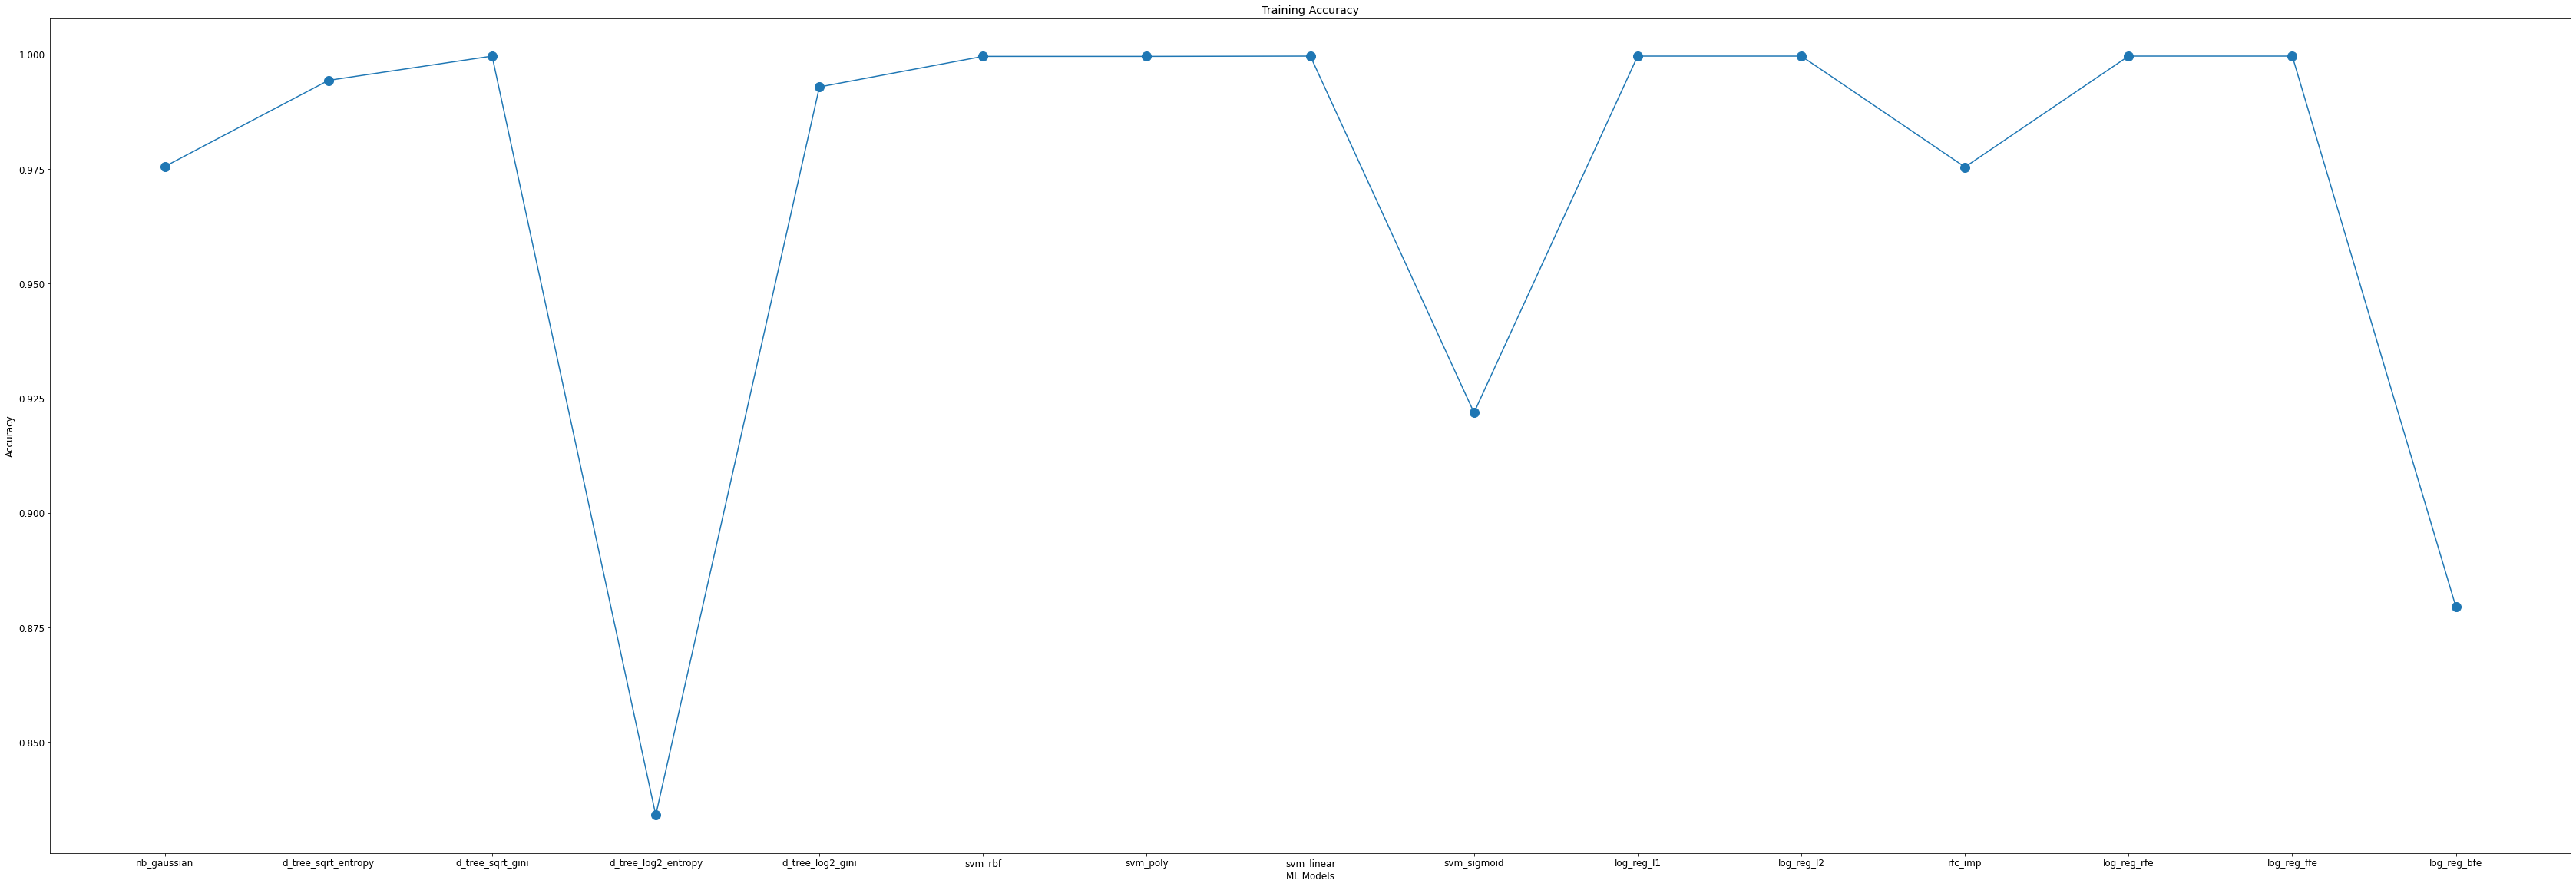

In [127]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Training Accuracy')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')

plt.plot(dict_training_accuracy.keys(), dict_training_accuracy.values(),  marker='o',  markersize=12)

fig.savefig('train_accuracy_line_graph.jpg',bbox_inches='tight')

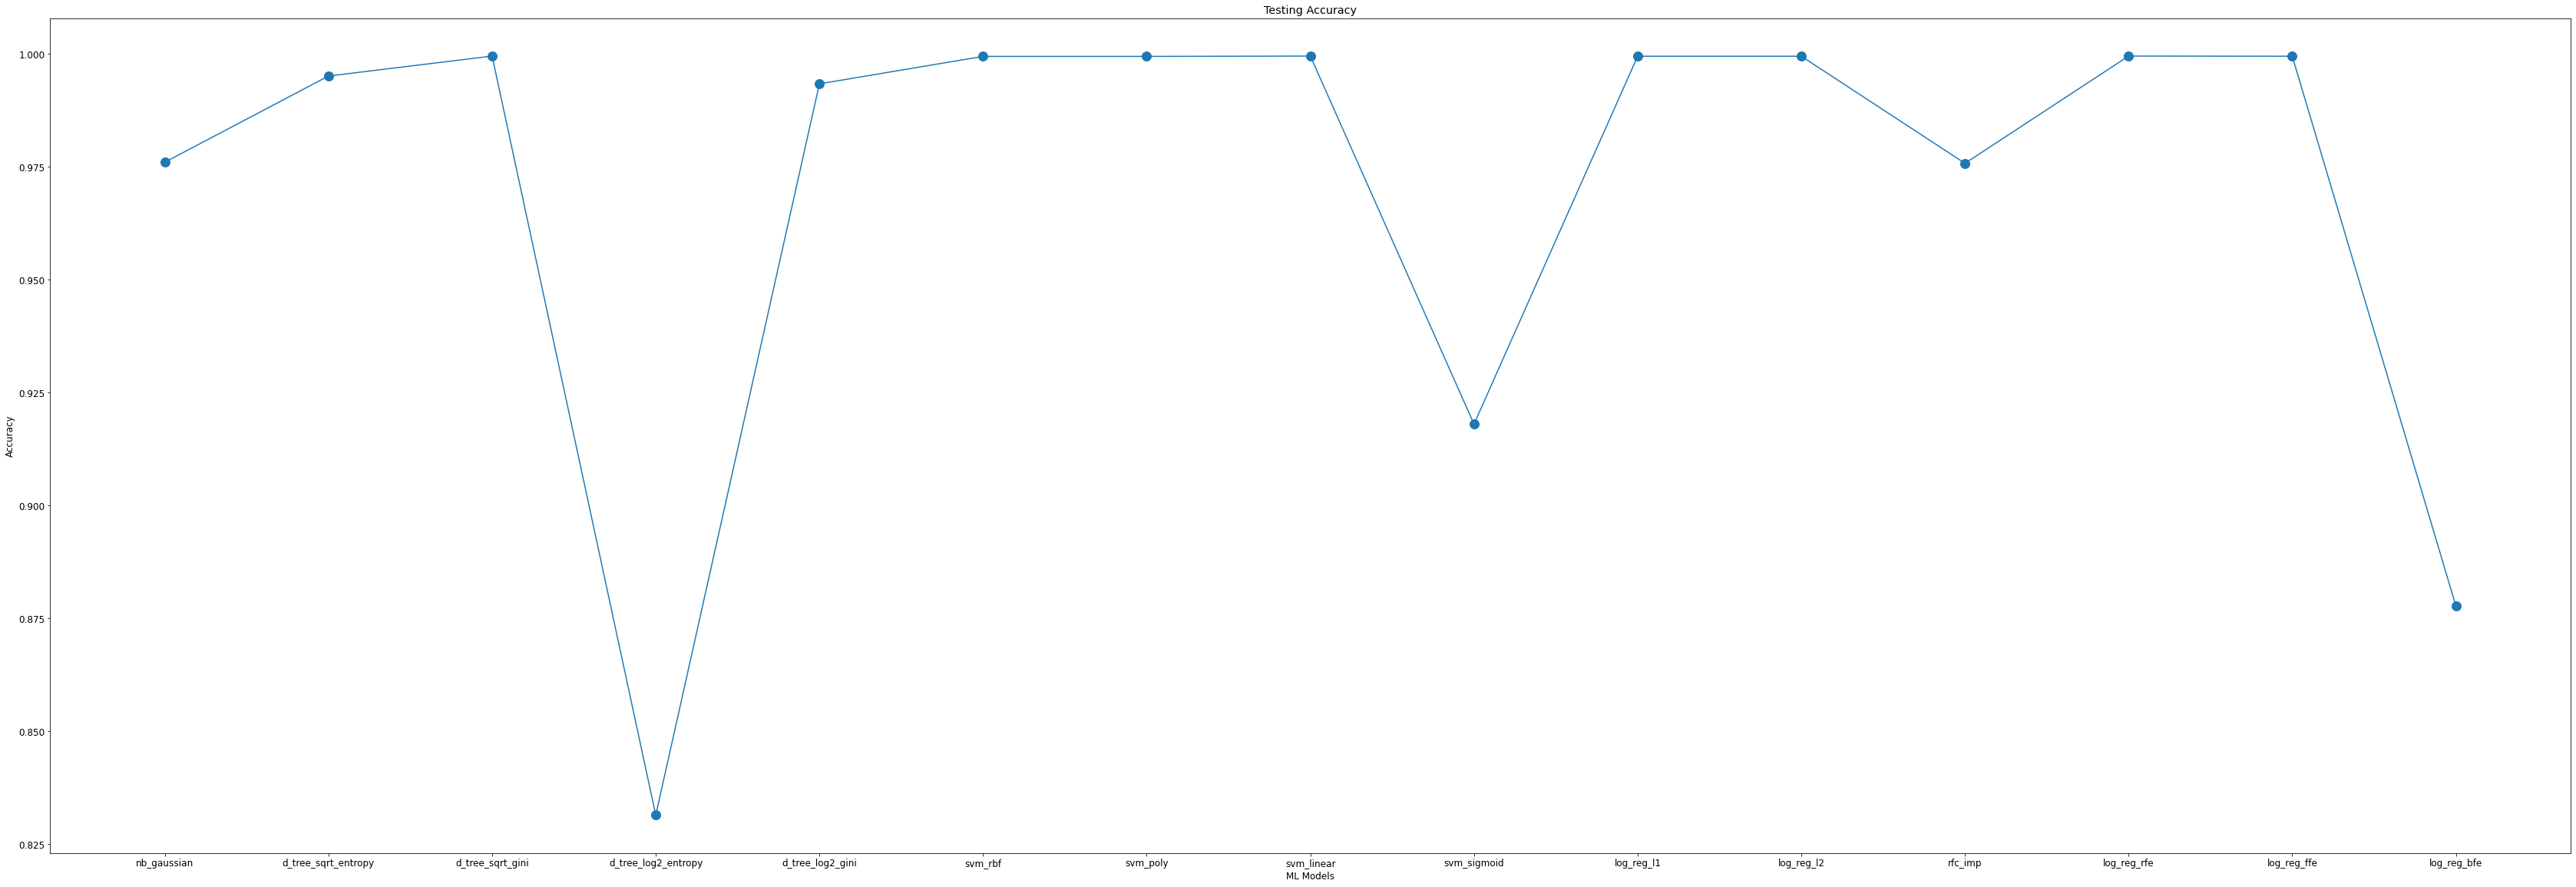

In [128]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Testing Accuracy')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')

plt.plot(dict_testing_accuracy.keys(), dict_testing_accuracy.values(),  marker='o',  markersize=12)
plt.show()

fig.savefig('test_accuracy_line_graph.jpg',bbox_inches='tight')

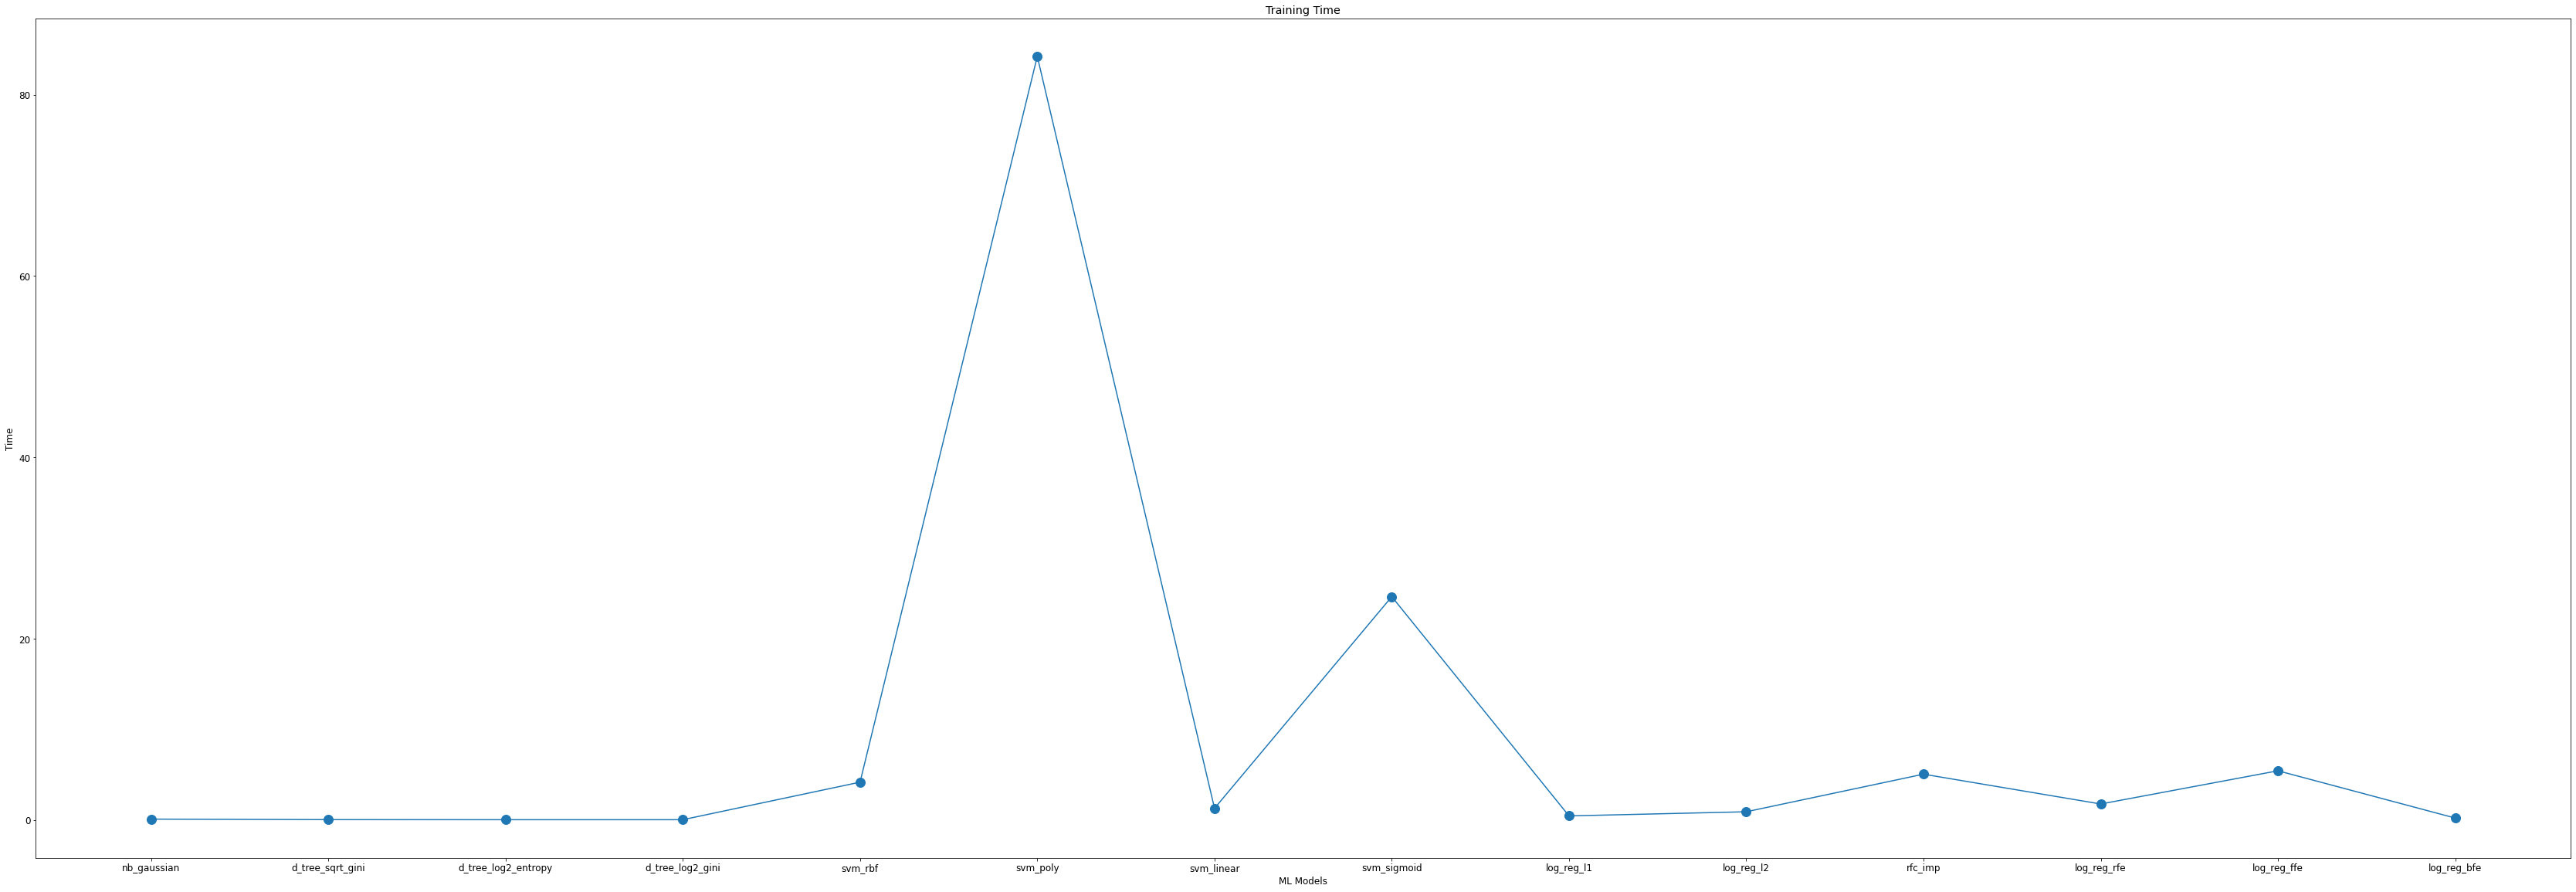

In [129]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Training Time')
plt.xlabel('ML Models')
plt.ylabel('Time')


plt.plot(dict_training_time.keys(), dict_training_time.values(),  marker='o',  markersize=12)
plt.show()

fig.savefig('train_time_line_graph.jpg',bbox_inches='tight')

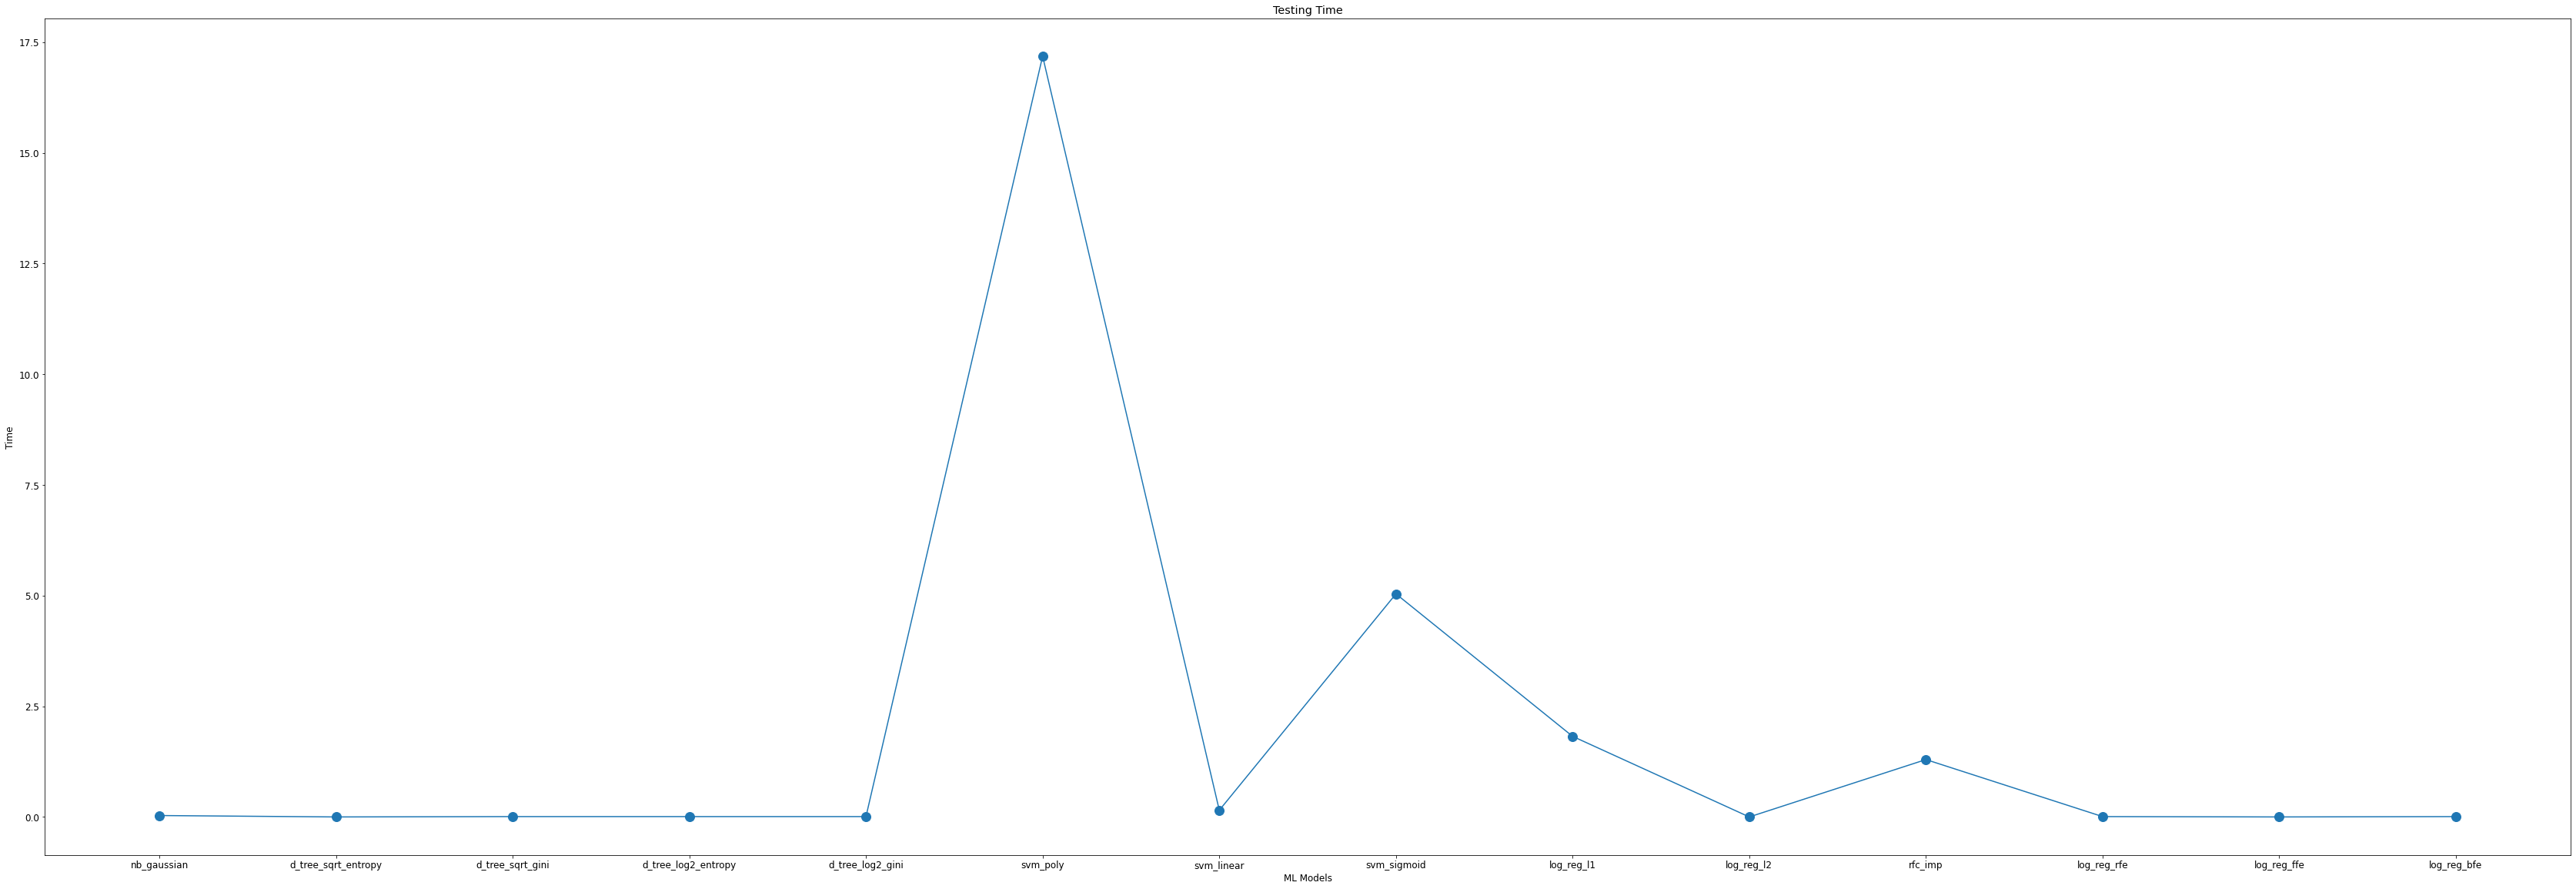

In [130]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Testing Time')
plt.xlabel('ML Models')
plt.ylabel('Time')


plt.plot(dict_testing_time.keys(), dict_testing_time.values(),  marker='o',  markersize=12)
plt.show()

fig.savefig('test_time_line_graph.jpg',bbox_inches='tight')

In [131]:
max_train_accuracy = max(dict_training_accuracy.keys(), key=(lambda k: dict_training_accuracy[k]))
max_test_accuracy = max(dict_testing_accuracy.keys(), key=(lambda k: dict_testing_accuracy[k]))

min_train_accuracy = min(dict_training_accuracy.keys(), key=(lambda k: dict_training_accuracy[k]))
min_test_accuracy = min(dict_testing_accuracy.keys(), key=(lambda k: dict_testing_accuracy[k]))

# 

max_train_time = max(dict_training_time.keys(), key=(lambda k: dict_training_time[k]))
max_test_time = max(dict_testing_time.keys(), key=(lambda k: dict_testing_time[k]))

min_train_time = min(dict_training_time.keys(), key=(lambda k: dict_training_time[k]))
min_test_time = min(dict_testing_time.keys(), key=(lambda k: dict_testing_time[k]))


In [132]:
print('Algorithm: ', max_train_accuracy,'\nMax Training Accuracy:', dict_training_accuracy[max_train_accuracy])

Algorithm:  d_tree_sqrt_gini 
Max Training Accuracy: 0.999599531760212


In [133]:
print('Algorithm: ', max_test_accuracy,'\nMax Testing Accuracy:', dict_testing_accuracy[max_test_accuracy])

Algorithm:  d_tree_sqrt_gini 
Max Testing Accuracy: 0.9994968553459119


In [134]:
print('Algorithm: ', min_train_accuracy,'\nMin Training Accuracy:', dict_training_accuracy[min_train_accuracy])

Algorithm:  d_tree_log2_entropy 
Min Training Accuracy: 0.8340983303554925


In [135]:
print('Algorithm: ', min_test_accuracy,'\nMin Testing Accuracy:', dict_testing_accuracy[min_test_accuracy])

Algorithm:  d_tree_log2_entropy 
Min Testing Accuracy: 0.8314106019766397


In [136]:
print('Algorithm: ', max_train_time,'\nMax Training Time:', dict_training_time[max_train_time])

Algorithm:  svm_poly 
Max Training Time: 84.23038411140442


In [137]:
print('Algorithm: ', max_test_time,'\nMax Testing Time:', dict_testing_time[max_test_time])

Algorithm:  svm_poly 
Max Testing Time: 17.181707620620728


In [138]:
print('Algorithm: ', min_train_time,'\nMin Training Time:', dict_training_time[min_train_time])

Algorithm:  d_tree_log2_entropy 
Min Training Time: 0.023984193801879883


In [139]:
print('Algorithm: ', min_test_time,'\nMin Testing Time:', dict_testing_time[min_test_time])

Algorithm:  d_tree_sqrt_entropy 
Min Testing Time: 0.0


In [140]:
sorted(dict_training_accuracy.items(), key=lambda x: x[1], reverse=True)

[('d_tree_sqrt_gini', 0.999599531760212),
 ('svm_linear', 0.999599531760212),
 ('log_reg_l1', 0.999599531760212),
 ('log_reg_l2', 0.999599531760212),
 ('log_reg_rfe', 0.999599531760212),
 ('log_reg_ffe', 0.999599531760212),
 ('svm_rbf', 0.999537921261783),
 ('svm_poly', 0.999537921261783),
 ('d_tree_sqrt_entropy', 0.9943010288953238),
 ('d_tree_log2_gini', 0.9928685848068511),
 ('nb_gaussian', 0.9755252294991067),
 ('rfc_imp', 0.9754020085022488),
 ('svm_sigmoid', 0.9218470827428994),
 ('log_reg_bfe', 0.8794898650730084),
 ('d_tree_log2_entropy', 0.8340983303554925)]

In [141]:
sorted(dict_testing_accuracy.items(), key=lambda x: x[1], reverse=True)

[('d_tree_sqrt_gini', 0.9994968553459119),
 ('svm_linear', 0.9994968553459119),
 ('log_reg_rfe', 0.9994968553459119),
 ('log_reg_l1', 0.9994609164420485),
 ('log_reg_l2', 0.9994609164420485),
 ('log_reg_ffe', 0.9994609164420485),
 ('svm_rbf', 0.999424977538185),
 ('svm_poly', 0.999424977538185),
 ('d_tree_sqrt_entropy', 0.9950763701707098),
 ('d_tree_log2_gini', 0.9933513027852651),
 ('nb_gaussian', 0.9759928122192273),
 ('rfc_imp', 0.9757412398921833),
 ('svm_sigmoid', 0.9179874213836478),
 ('log_reg_bfe', 0.8776999101527403),
 ('d_tree_log2_entropy', 0.8314106019766397)]

### Ensemble Methods

### Bagging 

#### BaggingClassifier - d_tree

In [142]:
from sklearn.ensemble import BaggingClassifier

bagging_clf_d_tree = BaggingClassifier(base_estimator= d_tree_sqrt_entropy ,n_estimators=50, random_state=42, max_features=2)

In [143]:
start_time = time.time()
bagging_clf_d_tree.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["bagging_clf_d_tree"] = end_time-start_time

Training time:  0.812345027923584


In [144]:
start_time = time.time()
y_test_bagging_clf_d_tree = bagging_clf_d_tree.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["bagging_clf_d_tree"] = end_time-start_time

Testing time:  0.10937952995300293


In [145]:
dict_training_accuracy["bagging_clf_d_tree"] =  bagging_clf_d_tree.score(X_train, y_train)
dict_testing_accuracy["bagging_clf_d_tree"] =  bagging_clf_d_tree.score(X_test, y_test)

print("Train score is:", bagging_clf_d_tree.score(X_train, y_train))
print("Test score is:",bagging_clf_d_tree.score(X_test,y_test))

Train score is: 0.9751709691331403
Test score is: 0.9754177897574124


##### Accuracy increases as no. of estimators increase

In [146]:
evaluate(bagging_clf_d_tree, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26427  1612]
 [    0 36885]]

ACCURACY SCORE:
0.9752

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.958127  0.975171      0.979063      0.976211
recall         0.942509      1.000000  0.975171      0.971254      0.975171
f1-score       0.970404      0.978616  0.975171      0.974510      0.975069
support    28039.000000  36885.000000  0.975171  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11277   684]
 [    0 15864]]

ACCURACY SCORE:
0.9754

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.958666  0.975418      0.979333      0.976434
recall         0.942814      1.000000  0.975418      0.971407      0.975418
f1-score       0.970565      0.978897  0.975418      0.974731      0.975315
sup

#### BaggingClassifer svm_linear

In [147]:
from sklearn.ensemble import BaggingClassifier

bagging_clf_svm_linear = BaggingClassifier(base_estimator= svm_linear ,n_estimators=50, random_state=42, max_features=2)

In [148]:
start_time = time.time()
bagging_clf_svm_linear.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["bagging_clf_svm_linear"] = end_time-start_time

Training time:  1002.3666250705719


In [149]:
start_time = time.time()
y_test_bagging_clf_svm_linear = bagging_clf_svm_linear.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["bagging_clf_svm_linear"] = end_time-start_time

Testing time:  215.3452603816986


In [150]:
dict_training_accuracy["bagging_clf_svm_linear"] =  bagging_clf_svm_linear.score(X_train, y_train)
dict_testing_accuracy["bagging_clf_svm_linear"] =  bagging_clf_svm_linear.score(X_test, y_test)

print("Train score is:", bagging_clf_svm_linear.score(X_train, y_train))
print("Test score is:",bagging_clf_svm_linear.score(X_test,y_test))

Train score is: 0.9651130552646171
Test score is: 0.963414195867026


In [151]:
evaluate(bagging_clf_svm_linear, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26412  1627]
 [  638 36247]]

ACCURACY SCORE:
0.9651

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.976414      0.957042  0.965113      0.966728      0.965408
recall         0.941974      0.982703  0.965113      0.962338      0.965113
f1-score       0.958885      0.969703  0.965113      0.964294      0.965031
support    28039.000000  36885.000000  0.965113  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11275   686]
 [  332 15532]]

ACCURACY SCORE:
0.9634

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.971397      0.957701  0.963414      0.964549      0.963588
recall         0.942647      0.979072  0.963414      0.960860      0.963414
f1-score       0.956806      0.968269  0.963414      0.962537      0.963341
sup

### Random Forest

#### Random Forest gini, sqrt

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf_gini_sqrt = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=1, max_features='sqrt')

In [153]:
start_time = time.time()
rf_gini_sqrt.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["rf_gini_sqrt"] = end_time-start_time

Training time:  1.0074408054351807


In [154]:
start_time = time.time()
y_test_rf_gini_sqrt = rf_gini_sqrt.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["rf_gini_sqrt"] = end_time-start_time

Testing time:  0.09376025199890137


In [155]:
dict_training_accuracy["rf_gini_sqrt"] =  rf_gini_sqrt.score(X_train, y_train)
dict_testing_accuracy["rf_gini_sqrt"] =  rf_gini_sqrt.score(X_test, y_test)

print("Train score is:", rf_gini_sqrt.score(X_train, y_train))
print("Test score is:",rf_gini_sqrt.score(X_test,y_test))

Train score is: 0.9939005606555357
Test score is: 0.994429469901168


In [156]:
evaluate(rf_gini_sqrt, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27646   393]
 [    3 36882]]

ACCURACY SCORE:
0.9939

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999891      0.989457  0.993901      0.994674      0.993963
recall         0.985984      0.999919  0.993901      0.992951      0.993901
f1-score       0.992889      0.994660  0.993901      0.993775      0.993895
support    28039.000000  36885.000000  0.993901  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11809   152]
 [    3 15861]]

ACCURACY SCORE:
0.9944

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999746      0.990508  0.994429      0.995127      0.994479
recall         0.987292      0.999811  0.994429      0.993551      0.994429
f1-score       0.993480      0.995138  0.994429      0.994309      0.994425
sup

#### Random Forest gini, log2

In [157]:
from sklearn.ensemble import RandomForestClassifier
rf_gini_log2 = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=1, max_features='log2')

In [158]:
start_time = time.time()
rf_gini_log2.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["rf_gini_log2"] = end_time-start_time

Training time:  0.972937822341919


In [159]:
start_time = time.time()
y_test_rf_gini_log2 = rf_gini_log2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["rf_gini_log2"] = end_time-start_time

Testing time:  0.0935678482055664


In [160]:
dict_training_accuracy["rf_gini_log2"] =  rf_gini_log2.score(X_train, y_train)
dict_testing_accuracy["rf_gini_log2"] =  rf_gini_log2.score(X_test, y_test)

print("Train score is:", rf_gini_log2.score(X_train, y_train))
print("Test score is:",rf_gini_log2.score(X_test,y_test))

Train score is: 0.9937927422832851
Test score is: 0.9942138364779874


In [161]:
evaluate(rf_gini_log2, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27639   400]
 [    3 36882]]

ACCURACY SCORE:
0.9938

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999891      0.989271  0.993793      0.994581      0.993858
recall         0.985734      0.999919  0.993793      0.992826      0.993793
f1-score       0.992762      0.994566  0.993793      0.993664      0.993787
support    28039.000000  36885.000000  0.993793  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11803   158]
 [    3 15861]]

ACCURACY SCORE:
0.9942

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999746      0.990137  0.994214      0.994941      0.994267
recall         0.986790      0.999811  0.994214      0.993301      0.994214
f1-score       0.993226      0.994950  0.994214      0.994088      0.994209
sup

#### Random Forest entropy, log2

In [162]:
from sklearn.ensemble import RandomForestClassifier
rf_entropy_log2 = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=1, max_features='log2')

In [163]:
start_time = time.time()
rf_entropy_log2.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["rf_entropy_log2"] = end_time-start_time

Training time:  1.14235258102417


In [164]:
start_time = time.time()
y_test_rf_entropy_log2 = rf_entropy_log2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["rf_entropy_log2"] = end_time-start_time

Testing time:  0.10280203819274902


In [165]:
dict_training_accuracy["rf_entropy_log2"] =  rf_entropy_log2.score(X_train, y_train)
dict_testing_accuracy["rf_entropy_log2"] =  rf_entropy_log2.score(X_test, y_test)

print("Train score is:", rf_entropy_log2.score(X_train, y_train))
print("Test score is:",rf_entropy_log2.score(X_test,y_test))

Train score is: 0.9938389501571068
Test score is: 0.9943216531895778


In [166]:
evaluate(rf_entropy_log2, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27642   397]
 [    3 36882]]

ACCURACY SCORE:
0.9938

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999891      0.989351  0.993839      0.994621      0.993903
recall         0.985841      0.999919  0.993839      0.992880      0.993839
f1-score       0.992817      0.994607  0.993839      0.993712      0.993834
support    28039.000000  36885.000000  0.993839  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11806   155]
 [    3 15861]]

ACCURACY SCORE:
0.9943

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999746      0.990322  0.994322      0.995034      0.994373
recall         0.987041      0.999811  0.994322      0.993426      0.994322
f1-score       0.993353      0.995044  0.994322      0.994198      0.994317
sup

#### Random Forest entropy, sqrt

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf_entropy_sqrt = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=1)

In [168]:
start_time = time.time()
rf_entropy_sqrt.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["rf_entropy_sqrt"] = end_time-start_time

Training time:  1.0704405307769775


In [169]:
start_time = time.time()
y_test_rf_entropy_sqrt = rf_entropy_sqrt.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["rf_entropy_sqrt"] = end_time-start_time

Testing time:  0.0972130298614502


In [170]:
dict_training_accuracy["rf_entropy_sqrt"] =  rf_entropy_sqrt.score(X_train, y_train)
dict_testing_accuracy["rf_entropy_sqrt"] =  rf_entropy_sqrt.score(X_test, y_test)

print("Train score is:", rf_entropy_sqrt.score(X_train, y_train))
print("Test score is:",rf_entropy_sqrt.score(X_test,y_test))

Train score is: 0.9952867968701867
Test score is: 0.9956154537286612


In [171]:
evaluate(rf_entropy_sqrt, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27736   303]
 [    3 36882]]

ACCURACY SCORE:
0.9953

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999892      0.991852  0.995287      0.995872      0.995324
recall         0.989194      0.999919  0.995287      0.994556      0.995287
f1-score       0.994514      0.995869  0.995287      0.995191      0.995284
support    28039.000000  36885.000000  0.995287  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11842   119]
 [    3 15861]]

ACCURACY SCORE:
0.9956

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999747      0.992553  0.995615      0.996150      0.995645
recall         0.990051      0.999811  0.995615      0.994931      0.995615
f1-score       0.994875      0.996169  0.995615      0.995522      0.995613
sup

#### Extra Tree Classifier

In [172]:
from sklearn.ensemble import ExtraTreesClassifier
ext_classifier = ExtraTreesClassifier(max_depth=1)

In [173]:

start_time = time.time()
ext_classifier.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["ext_classifier"] = end_time-start_time

Training time:  0.5455703735351562


In [174]:
start_time = time.time()
y_test_ext_classifier = ext_classifier.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["ext_classifier"] = end_time-start_time

Testing time:  0.08651232719421387


In [175]:
dict_training_accuracy["ext_classifier"] =  ext_classifier.score(X_train, y_train)
dict_testing_accuracy["ext_classifier"] =  ext_classifier.score(X_test, y_test)

print("Train score is:", ext_classifier.score(X_train, y_train))
print("Test score is:",ext_classifier.score(X_test,y_test))

Train score is: 0.9329831803339289
Test score is: 0.9327583108715184


In [176]:
evaluate(ext_classifier, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[23688  4351]
 [    0 36885]]

ACCURACY SCORE:
0.9330

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.894485  0.932983      0.947243      0.940054
recall         0.844823      1.000000  0.932983      0.922412      0.932983
f1-score       0.915885      0.944304  0.932983      0.930095      0.932031
support    28039.000000  36885.000000  0.932983  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[10091  1870]
 [    1 15863]]

ACCURACY SCORE:
0.9328

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999901      0.894547  0.932758      0.947224      0.939835
recall         0.843659      0.999937  0.932758      0.921798      0.932758
f1-score       0.915159      0.944311  0.932758      0.929735      0.931779
sup

#### Extra Tree Classifier entropy ,int ,log2

In [177]:
from sklearn.ensemble import ExtraTreesClassifier
ext_classifier_entropy_log2 = ExtraTreesClassifier(n_estimators=1000, max_depth=2, max_features='log2', criterion='entropy')

In [178]:

start_time = time.time()
ext_classifier_entropy_log2.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["ext_classifier_entropy_log2"] = end_time-start_time

Training time:  7.8932037353515625


In [179]:
start_time = time.time()
y_test_ext_classifier_entropy_log2 = ext_classifier_entropy_log2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["ext_classifier_entropy_log2"] = end_time-start_time

Testing time:  1.2516531944274902


In [180]:
dict_training_accuracy["ext_classifier_entropy_log2"] =  ext_classifier_entropy_log2.score(X_train, y_train)
dict_testing_accuracy["ext_classifier_entropy_log2"] =  ext_classifier_entropy_log2.score(X_test, y_test)

print("Train score is:", ext_classifier_entropy_log2.score(X_train, y_train))
print("Test score is:",ext_classifier_entropy_log2.score(X_test,y_test))

Train score is: 0.975217177006962
Test score is: 0.9755256064690027


In [181]:
evaluate(ext_classifier_entropy_log2, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[26453  1586]
 [   23 36862]]

ACCURACY SCORE:
0.9752

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999131      0.958749  0.975217      0.978940      0.976189
recall         0.943436      0.999376  0.975217      0.971406      0.975217
f1-score       0.970485      0.978641  0.975217      0.974563      0.975119
support    28039.000000  36885.000000  0.975217  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11293   668]
 [   13 15851]]

ACCURACY SCORE:
0.9755

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998850      0.959562  0.975526      0.979206      0.976450
recall         0.944152      0.999181  0.975526      0.971666      0.975526
f1-score       0.970731      0.978970  0.975526      0.974851      0.975429
sup

### Boosting 



#### AdaBoost Classfier , base_estimator= d_tree_sqrt_entropy

In [253]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf_d_tree = AdaBoostClassifier(base_estimator= d_tree_sqrt_entropy ,n_estimators=1, learning_rate=0.30)

In [254]:
start_time = time.time()
ada_boost_clf_d_tree.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["ada_boost_clf_d_tree"] = end_time-start_time

Training time:  0.0768289566040039


In [255]:
start_time = time.time()
y_test_ada_boost_clf_d_tree = ada_boost_clf_d_tree.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["ada_boost_clf_d_tree"] = end_time-start_time

Testing time:  0.005984306335449219


In [261]:
dict_training_accuracy["ada_boost_clf_d_tree"] =  ada_boost_clf_d_tree.score(X_train, y_train)
dict_testing_accuracy["ada_boost_clf_d_tree"] =  ada_boost_clf_d_tree.score(X_test, y_test)

print("Train score is:", ada_boost_clf_d_tree.score(X_train, y_train))
print("Test score is:",ada_boost_clf_d_tree.score(X_test,y_test))

Train score is: 0.9837040231655474
Test score is: 0.9849775381850854


In [262]:
evaluate(ada_boost_clf_d_tree, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27117   922]
 [  136 36749]]

ACCURACY SCORE:
0.9837

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.995010      0.975525  0.983704      0.985267      0.983940
recall         0.967117      0.996313  0.983704      0.981715      0.983704
f1-score       0.980865      0.985809  0.983704      0.983337      0.983674
support    28039.000000  36885.000000  0.983704  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11602   359]
 [   59 15805]]

ACCURACY SCORE:
0.9850

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.994940      0.977790  0.984978      0.986365      0.985162
recall         0.969986      0.996281  0.984978      0.983133      0.984978
f1-score       0.982305      0.986949  0.984978      0.984627      0.984953
sup

#### AdaBoostClassifier base_estimator= nb_gaussian

In [187]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf_nb = AdaBoostClassifier(base_estimator= nb_gaussian ,n_estimators=30)  

In [188]:
start_time = time.time()
ada_boost_clf_nb.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["ada_boost_clf_nb"] = end_time-start_time

Training time:  0.5310869216918945


In [189]:
start_time = time.time()
y_test_ada_boost_clf_nb = ada_boost_clf_nb.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["ada_boost_clf_nb"] = end_time-start_time

Testing time:  0.09372854232788086


In [190]:
dict_training_accuracy["ada_boost_clf_nb"] =  ada_boost_clf_nb.score(X_train, y_train)
dict_testing_accuracy["ada_boost_clf_nb"] =  ada_boost_clf_nb.score(X_test, y_test)

print("Train score is:", ada_boost_clf_nb.score(X_train, y_train))
print("Test score is:",ada_boost_clf_nb.score(X_test,y_test))

Train score is: 0.9314121126239912
Test score is: 0.9303863432165319


In [191]:
evaluate(ada_boost_clf_nb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[23586  4453]
 [    0 36885]]

ACCURACY SCORE:
0.9314

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.892278  0.931412      0.946139      0.938801
recall         0.841185      1.000000  0.931412      0.920593      0.931412
f1-score       0.913743      0.943073  0.931412      0.928408      0.930406
support    28039.000000  36885.000000  0.931412  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[10024  1937]
 [    0 15864]]

ACCURACY SCORE:
0.9304

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      1.000000      0.891186  0.930386      0.945593      0.937961
recall         0.838057      1.000000  0.930386      0.919029      0.930386
f1-score       0.911894      0.942462  0.930386      0.927178      0.929322
sup

In [192]:
# svm, log reg take infinite time with Adaboost Classifier or give probabolity error

### Gradient Boosting

In [302]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=30, loss='log_loss', max_depth=1, init=d_tree_sqrt_entropy, random_state=42, max_features='log2')

In [303]:
start_time = time.time()
grad_boost_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["grad_boost_clf"] = end_time-start_time


Training time:  0.44381117820739746


In [304]:
start_time = time.time()
y_test_grad_boost_clf = grad_boost_clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["grad_boost_clf"] = end_time-start_time


Testing time:  0.008010149002075195


In [305]:
dict_training_accuracy["grad_boost_clf"] =  grad_boost_clf.score(X_train, y_train)
dict_testing_accuracy["grad_boost_clf"] =  grad_boost_clf.score(X_test, y_test)

print("Train score is:", grad_boost_clf.score(X_train, y_train))
print("Test score is:",grad_boost_clf.score(X_test,y_test))


Train score is: 0.9999075842523566
Test score is: 0.9998921832884097


In [306]:
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28037     2]
 [    4 36881]]

ACCURACY SCORE:
0.9999

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999857      0.999946  0.999908      0.999902      0.999908
recall         0.999929      0.999892  0.999908      0.999910      0.999908
f1-score       0.999893      0.999919  0.999908      0.999906      0.999908
support    28039.000000  36885.000000  0.999908  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11959     2]
 [    1 15863]]

ACCURACY SCORE:
0.9999

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999916      0.999874  0.999892      0.999895      0.999892
recall         0.999833      0.999937  0.999892      0.999885      0.999892
f1-score       0.999875      0.999905  0.999892      0.999890      0.999892
sup

In [198]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf_nb = GradientBoostingClassifier(n_estimators=30, loss='log_loss', max_depth=1, init=nb_gaussian, random_state=42, max_features='log2')

In [199]:
start_time = time.time()
grad_boost_clf_nb.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["grad_boost_clf_nb"] = end_time-start_time


Training time:  0.5188074111938477


In [200]:
start_time = time.time()
y_test_grad_boost_clf_nb = grad_boost_clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["grad_boost_clf_nb"] = end_time-start_time


Testing time:  0.0


In [201]:
dict_training_accuracy["grad_boost_clf_nb"] =  grad_boost_clf_nb.score(X_train, y_train)
dict_testing_accuracy["grad_boost_clf_nb"] =  grad_boost_clf_nb.score(X_test, y_test)

print("Train score is:", grad_boost_clf_nb.score(X_train, y_train))
print("Test score is:",grad_boost_clf_nb.score(X_test,y_test))


Train score is: 0.6846928716653318
Test score is: 0.6883378256963163


In [202]:
evaluate(grad_boost_clf_nb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[24468  3571]
 [16900 19985]]

ACCURACY SCORE:
0.6847

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.591472      0.848404  0.684693      0.719938      0.737441
recall         0.872642      0.541819  0.684693      0.707230      0.684693
f1-score       0.705059      0.661306  0.684693      0.683182      0.680202
support    28039.000000  36885.000000  0.684693  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[10410  1551]
 [ 7121  8743]]

ACCURACY SCORE:
0.6883

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.593805      0.849330  0.688338      0.721567      0.739489
recall         0.870329      0.551122  0.688338      0.710725      0.688338
f1-score       0.705954      0.668476  0.688338      0.687215      0.684587
sup

### Stacking Ensemble

In [203]:
from sklearn.ensemble import StackingClassifier

classifiers_best = [('d_tree_sqrt_entropy', d_tree_sqrt_entropy ), 
                   ('svm_linear',svm_linear),
#                    ('log_reg_l1',log_reg_l1),
                    ('rf_entropy_log2',rf_entropy_log2),
                    ('nb_gaussian',nb_gaussian),
                    ('ext_classifier_entropy_log2',ext_classifier_entropy_log2)
                   ]


stacking_clf = StackingClassifier(estimators=classifiers_best, final_estimator=log_reg_l1, cv=5)

In [204]:
start_time = time.time()
stacking_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["stacking_clf"] = end_time-start_time


Training time:  49.982088804244995


In [205]:
start_time = time.time()
y_test_stacking_clf = stacking_clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["stacking_clf"] = end_time-start_time


Testing time:  1.2842297554016113


In [206]:

#
dict_training_accuracy["stacking_clf"] =  stacking_clf.score(X_train, y_train)
dict_testing_accuracy["stacking_clf"] =  stacking_clf.score(X_test, y_test)

print("Train score is:", stacking_clf.score(X_train, y_train))
print("Test score is:",stacking_clf.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994968553459119


In [207]:
evaluate(stacking_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11961     0]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      1.000000  0.999497      0.999415      0.999497
recall         1.000000      0.999117  0.999497      0.999559      0.999497
f1-score       0.999415      0.999559  0.999497      0.999487      0.999497
sup

### Voting Ensemble

In [208]:
from sklearn.ensemble import  VotingClassifier


classifiers_best = [('d_tree_sqrt_entropy', d_tree_sqrt_entropy ), 
                   ('svm_linear',svm_linear),
                   ('log_reg_l1',log_reg_l1),
                    ('rf_entropy_log2',rf_entropy_log2),
                    ('nb_gaussian',nb_gaussian),
#                     ('ext_classifier_entropy_log2',ext_classifier_entropy_log2)
                   ]


voting_clf = VotingClassifier(estimators=classifiers_best, 
                              weights=[0.99, 0.88, 0.77, 0.50, 0.10], 
                              voting='hard')

#best weights = weights=[0.99, 0.88, 0.77, 0.50, 0.10]

In [209]:
start_time = time.time()
voting_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["voting_clf"] = end_time-start_time


Training time:  2.369664430618286


In [210]:
start_time = time.time()
y_test_voting_clf = voting_clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["voting_clf"] = end_time-start_time


Testing time:  0.395953893661499


In [211]:

#
dict_training_accuracy["voting_clf"] =  voting_clf.score(X_train, y_train)
dict_testing_accuracy["voting_clf"] =  voting_clf.score(X_test, y_test)

print("Train score is:", voting_clf.score(X_train, y_train))
print("Test score is:",voting_clf.score(X_test,y_test))

Train score is: 0.999599531760212
Test score is: 0.9994968553459119


In [212]:
evaluate(voting_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28039     0]
 [   26 36859]]

ACCURACY SCORE:
0.9996

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999074      1.000000    0.9996      0.999537        0.9996
recall         1.000000      0.999295    0.9996      0.999648        0.9996
f1-score       0.999537      0.999647    0.9996      0.999592        0.9996
support    28039.000000  36885.000000    0.9996  64924.000000    64924.0000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11961     0]
 [   14 15850]]

ACCURACY SCORE:
0.9995

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.998831      1.000000  0.999497      0.999415      0.999497
recall         1.000000      0.999117  0.999497      0.999559      0.999497
f1-score       0.999415      0.999559  0.999497      0.999487      0.999497
sup

### Voting Ensemble soft voting


In [213]:

from sklearn.metrics import accuracy_score

scores = [dict_testing_accuracy['d_tree_sqrt_entropy'], 
#           dict_testing_accuracy['svm_linear'], 
          dict_testing_accuracy['log_reg_l1'], 
          dict_testing_accuracy['rf_entropy_log2'],
          dict_testing_accuracy['nb_gaussian'],
          dict_testing_accuracy['ext_classifier_entropy_log2'],
          
         ]

In [214]:
from sklearn.ensemble import  VotingClassifier


classifiers_best = [('d_tree_sqrt_entropy', d_tree_sqrt_entropy ), 
#                    ('svm_linear',svm_linear),
                   ('log_reg_l1',log_reg_l1),
                    ('rf_entropy_log2',rf_entropy_log2),
                    ('nb_gaussian',nb_gaussian),
                    ('ext_classifier_entropy_log2',ext_classifier_entropy_log2)
                   ]


voting_clf_soft = VotingClassifier(estimators=classifiers_best, weights=scores, voting='soft', )


In [215]:
start_time = time.time()
voting_clf_soft.fit(X_train, y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

dict_training_time["voting_clf_soft"] = end_time-start_time


Training time:  9.830753803253174


In [216]:
start_time = time.time()
y_test_voting_clf_soft = voting_clf_soft.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

dict_testing_time["voting_clf_soft"] = end_time-start_time


Testing time:  1.2220993041992188


In [217]:

#
dict_training_accuracy["voting_clf_soft"] =  voting_clf_soft.score(X_train, y_train)
dict_testing_accuracy["voting_clf_soft"] =  voting_clf_soft.score(X_test, y_test)

print("Train score is:", voting_clf_soft.score(X_train, y_train))
print("Test score is:",voting_clf_soft.score(X_test,y_test))

Train score is: 0.9976588010597006
Test score is: 0.9981311769991015


In [218]:
evaluate(voting_clf_soft, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[27890   149]
 [    3 36882]]

ACCURACY SCORE:
0.9977

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999892      0.995976  0.997659      0.997934      0.997668
recall         0.994686      0.999919  0.997659      0.997302      0.997659
f1-score       0.997282      0.997944  0.997659      0.997613      0.997658
support    28039.000000  36885.000000  0.997659  64924.000000  64924.000000
_________________________________________________________________________________

TESTING RESULTS: 
CONFUSION MATRIX:
[[11914    47]
 [    5 15859]]

ACCURACY SCORE:
0.9981

CLASSIFICATION REPORT:
           No Intrusion     Intrusion  accuracy     macro avg  weighted avg
precision      0.999581      0.997045  0.998131      0.998313      0.998135
recall         0.996071      0.999685  0.998131      0.997878      0.998131
f1-score       0.997822      0.998363  0.998131      0.998093      0.998131
sup

In [219]:


# def poly_kernel(x_i, x_j):
#     return x_i.dot(x_j.T) 

In [220]:
# svm_custom_poly = SVC(kernel=poly_kernel, gamma='scale')

In [221]:
# start_time = time.time()
# svm_custom_poly.fit(X_train, y_train.values.ravel())
# end_time = time.time()
# print("Training time: ",end_time-start_time)

# dict_training_time["svm_custom_poly"] = end_time-start_time

In [222]:
# start_time = time.time()
# y_test_svm_custom_poly = svm_custom_poly.predict(X_test)
# end_time = time.time()
# print("Testing time: ",end_time-start_time)

# dict_testing_time["svm_custom_poly"] = end_time-start_time

In [223]:
# dict_training_accuracy["svm_custom_poly"] = svm_custom_poly.score(X_train, y_train)
# dict_testing_accuracy["svm_custom_poly"] = svm_custom_poly.score(X_test,y_test)

# print("Train score is:", svm_custom_poly.score(X_train, y_train))
# print("Test score is:", svm_custom_poly.score(X_test,y_test))

In [224]:
# import numpy as np
# def get_gram(x1, x2, kernel):
#     return np.array([[kernel(_x1, _x2) for _x2 in x2] for _x1 in x1])
# def RBF(x1, x2, gamma  = 1):
#     return np.exp(-gamma*np.linalg.norm(x1-x2))

In [225]:
# ### Hybrid Kernel SVM

# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# clf1 = SVC(kernel = 'precomputed')
# clf1.fit(get_gram(X_train, X_train, RBF), y_train)
# print(f'Accuracy on Custom Kernel: {accuracy_score(y_test, clf1.predict(get_gram(X_test, X_train, RBF)))}')

## Results

In [307]:
dict_training_accuracy

{'nb_gaussian': 0.9755252294991067,
 'd_tree_sqrt_entropy': 0.9943010288953238,
 'd_tree_sqrt_gini': 0.9738925512907399,
 'd_tree_log2_entropy': 0.8340983303554925,
 'd_tree_log2_gini': 0.9928685848068511,
 'svm_rbf': 0.999537921261783,
 'svm_poly': 0.999537921261783,
 'svm_linear': 0.999599531760212,
 'svm_sigmoid': 0.9218470827428994,
 'log_reg_l1': 0.999599531760212,
 'log_reg_l2': 0.999599531760212,
 'rfc_imp': 0.9754020085022488,
 'log_reg_rfe': 0.999599531760212,
 'log_reg_ffe': 0.999599531760212,
 'log_reg_bfe': 0.8794898650730084,
 'bagging_clf_d_tree': 0.9751709691331403,
 'bagging_clf_svm_linear': 0.9651130552646171,
 'rf_gini_sqrt': 0.9939005606555357,
 'rf_gini_log2': 0.9937927422832851,
 'rf_entropy_log2': 0.9938389501571068,
 'rf_entropy_sqrt': 0.9952867968701867,
 'ext_classifier': 0.9329831803339289,
 'ext_classifier_entropy_log2': 0.975217177006962,
 'ada_boost_clf_d_tree': 0.9837040231655474,
 'ada_boost_clf_nb': 0.9314121126239912,
 'grad_boost_clf': 0.99990758425235

In [308]:
dict_testing_accuracy

{'nb_gaussian': 0.9759928122192273,
 'd_tree_sqrt_entropy': 0.9950763701707098,
 'd_tree_sqrt_gini': 0.9739802336028751,
 'd_tree_log2_entropy': 0.8314106019766397,
 'd_tree_log2_gini': 0.9933513027852651,
 'svm_rbf': 0.999424977538185,
 'svm_poly': 0.999424977538185,
 'svm_linear': 0.9994968553459119,
 'svm_sigmoid': 0.9179874213836478,
 'log_reg_l1': 0.9994609164420485,
 'log_reg_l2': 0.9994609164420485,
 'rfc_imp': 0.9757412398921833,
 'log_reg_rfe': 0.9994968553459119,
 'log_reg_ffe': 0.9994609164420485,
 'log_reg_bfe': 0.8776999101527403,
 'bagging_clf_d_tree': 0.9754177897574124,
 'bagging_clf_svm_linear': 0.963414195867026,
 'rf_gini_sqrt': 0.994429469901168,
 'rf_gini_log2': 0.9942138364779874,
 'rf_entropy_log2': 0.9943216531895778,
 'rf_entropy_sqrt': 0.9956154537286612,
 'ext_classifier': 0.9327583108715184,
 'ext_classifier_entropy_log2': 0.9755256064690027,
 'ada_boost_clf_d_tree': 0.9849775381850854,
 'ada_boost_clf_nb': 0.9303863432165319,
 'grad_boost_clf': 0.9998921832

In [309]:
dict_training_time

{'nb_gaussian': 0.08794450759887695,
 'd_tree_sqrt_gini': 0.02595973014831543,
 'd_tree_log2_entropy': 0.023984193801879883,
 'd_tree_log2_gini': 0.024019241333007812,
 'svm_rbf': 4.1639404296875,
 'svm_poly': 84.23038411140442,
 'svm_linear': 0.9653904438018799,
 'svm_sigmoid': 24.630440950393677,
 'log_reg_l1': 0.4409925937652588,
 'log_reg_l2': 0.8993227481842041,
 'rfc_imp': 5.045454978942871,
 'log_reg_rfe': 1.757613182067871,
 'log_reg_ffe': 5.420334339141846,
 'log_reg_bfe': 0.2062087059020996,
 'bagging_clf_d_tree': 0.812345027923584,
 'bagging_clf_svm_linear': 1002.3666250705719,
 'rf_gini_sqrt': 1.0074408054351807,
 'rf_gini_log2': 0.972937822341919,
 'rf_entropy_log2': 1.14235258102417,
 'rf_entropy_sqrt': 1.0704405307769775,
 'ext_classifier': 0.5455703735351562,
 'ext_classifier_entropy_log2': 7.8932037353515625,
 'ada_boost_clf_d_tree': 0.0768289566040039,
 'ada_boost_clf_nb': 0.5310869216918945,
 'grad_boost_clf': 0.44381117820739746,
 'grad_boost_clf_nb': 0.518807411193

In [310]:
dict_testing_time

{'nb_gaussian': 0.03197789192199707,
 'd_tree_sqrt_entropy': 0.0,
 'd_tree_sqrt_gini': 0.0029926300048828125,
 'd_tree_log2_entropy': 0.00799417495727539,
 'd_tree_log2_gini': 0.007967233657836914,
 'svm_poly': 17.181707620620728,
 'svm_linear': 0.10671353340148926,
 'svm_sigmoid': 5.038311958312988,
 'log_reg_l1': 1.8200562000274658,
 'log_reg_l2': 0.0,
 'rfc_imp': 1.2958440780639648,
 'log_reg_rfe': 0.007965803146362305,
 'log_reg_ffe': 0.0,
 'log_reg_bfe': 0.007790088653564453,
 'bagging_clf_d_tree': 0.10937952995300293,
 'bagging_clf_svm_linear': 215.3452603816986,
 'rf_gini_sqrt': 0.09376025199890137,
 'rf_gini_log2': 0.0935678482055664,
 'rf_entropy_log2': 0.10280203819274902,
 'rf_entropy_sqrt': 0.0972130298614502,
 'ext_classifier': 0.08651232719421387,
 'ext_classifier_entropy_log2': 1.2516531944274902,
 'ada_boost_clf_d_tree': 0.005984306335449219,
 'ada_boost_clf_nb': 0.09372854232788086,
 'grad_boost_clf': 0.008010149002075195,
 'grad_boost_clf_nb': 0.0,
 'stacking_clf': 1.

<ipython-input-311-7cd122881f63>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131)


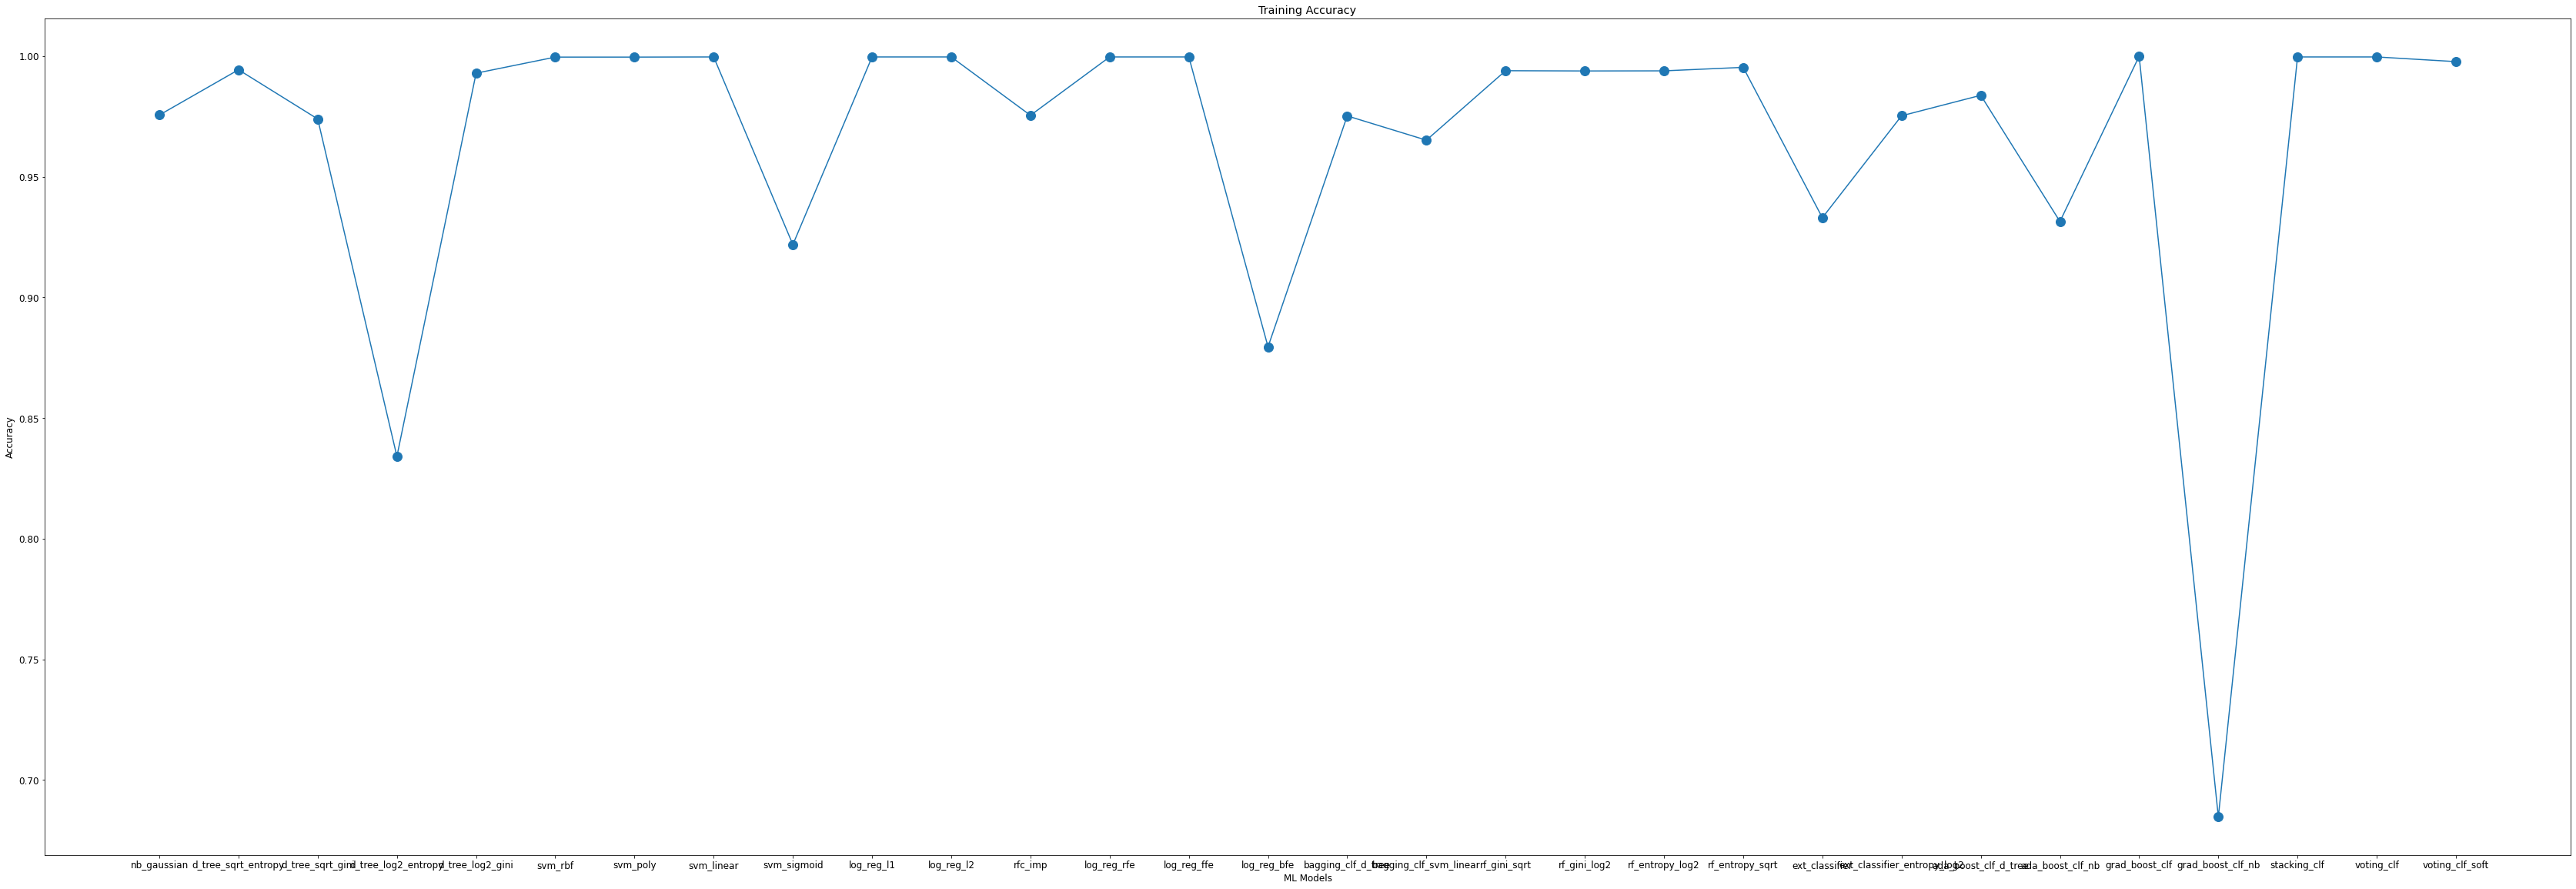

In [311]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Training Accuracy')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')

plt.subplot(131)
plt.plot(dict_training_accuracy.keys(), dict_training_accuracy.values(),  marker='o',  markersize=12)

fig.savefig('train_accuracy_line_graph.jpg',bbox_inches='tight')

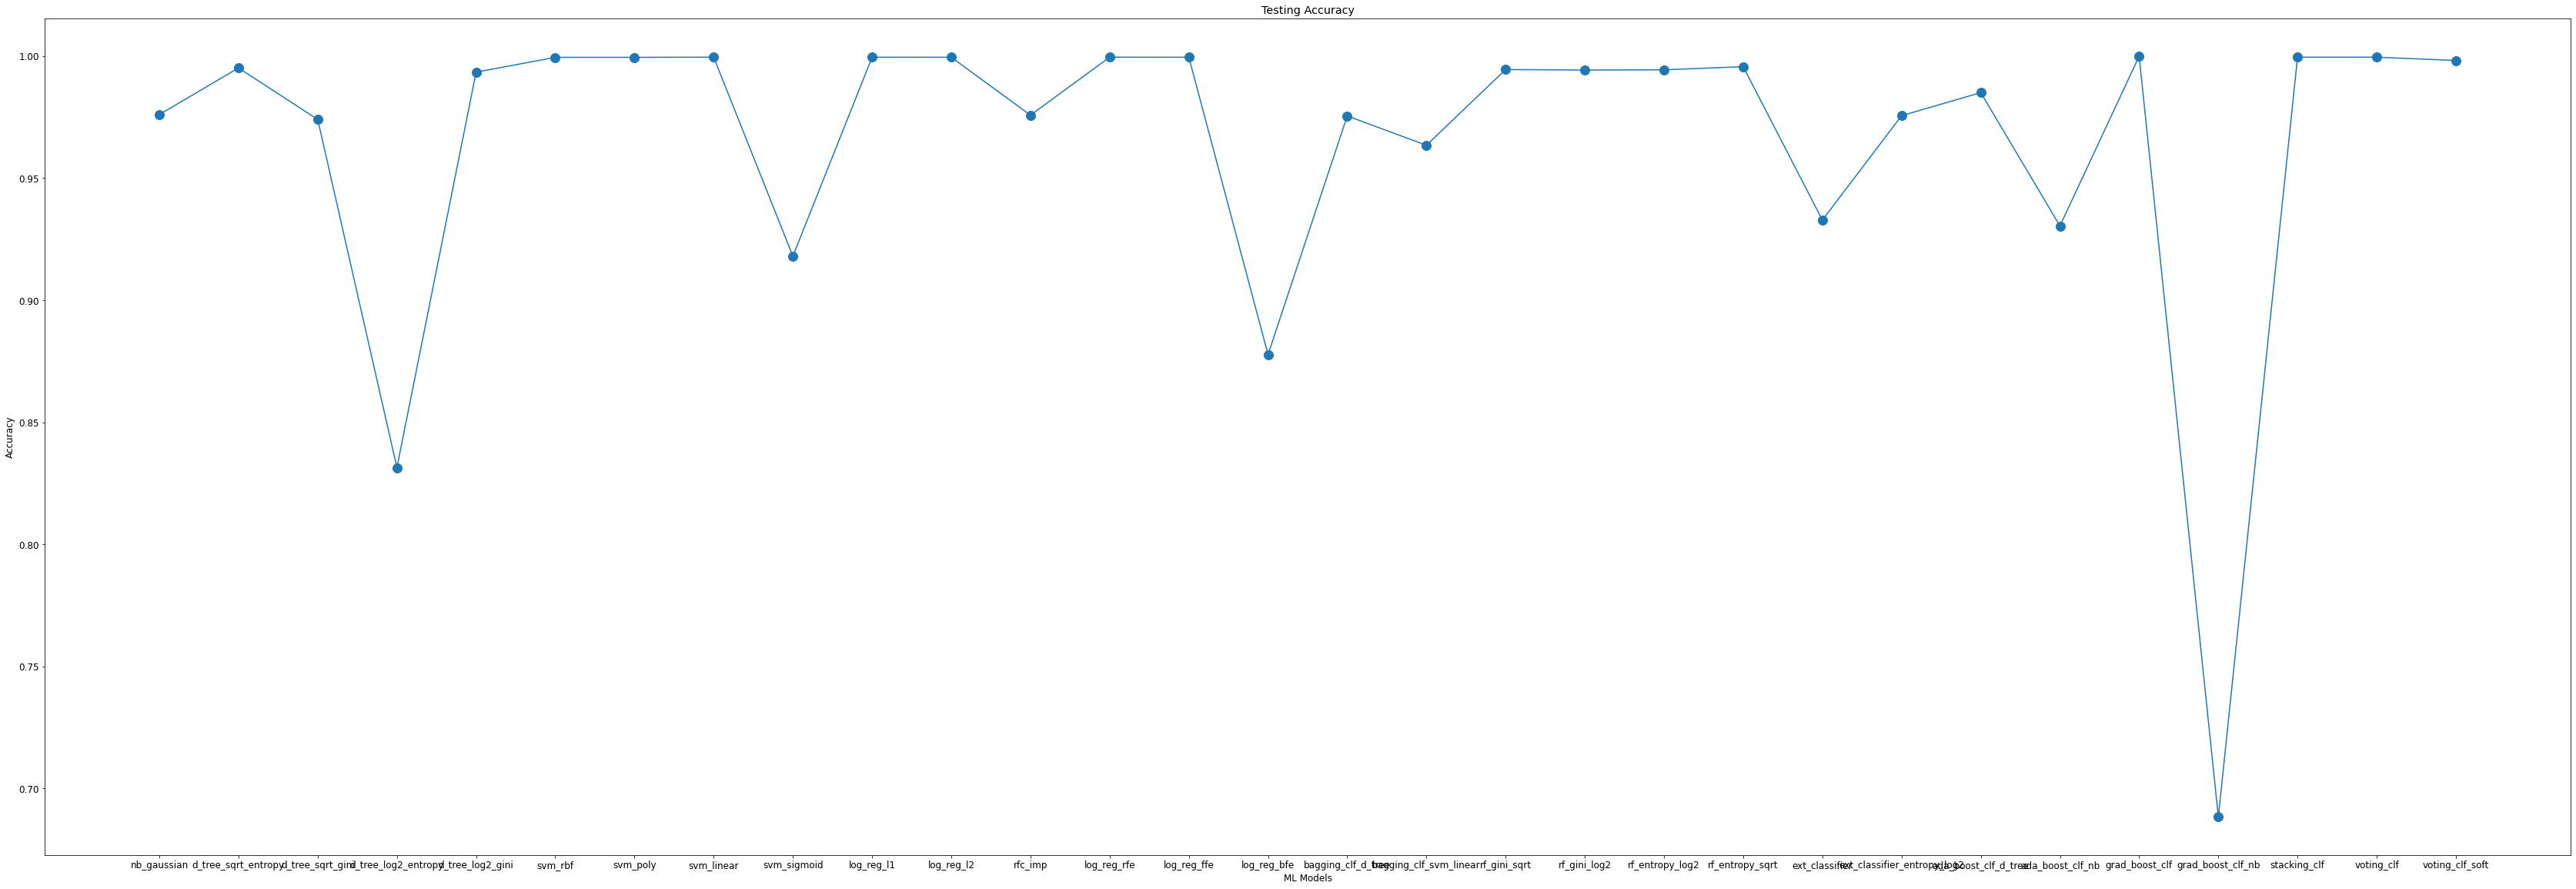

In [312]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Testing Accuracy')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')

plt.plot(dict_testing_accuracy.keys(), dict_testing_accuracy.values(),  marker='o',  markersize=12)

fig.savefig('test_accuracy_line_graph.jpg',bbox_inches='tight')

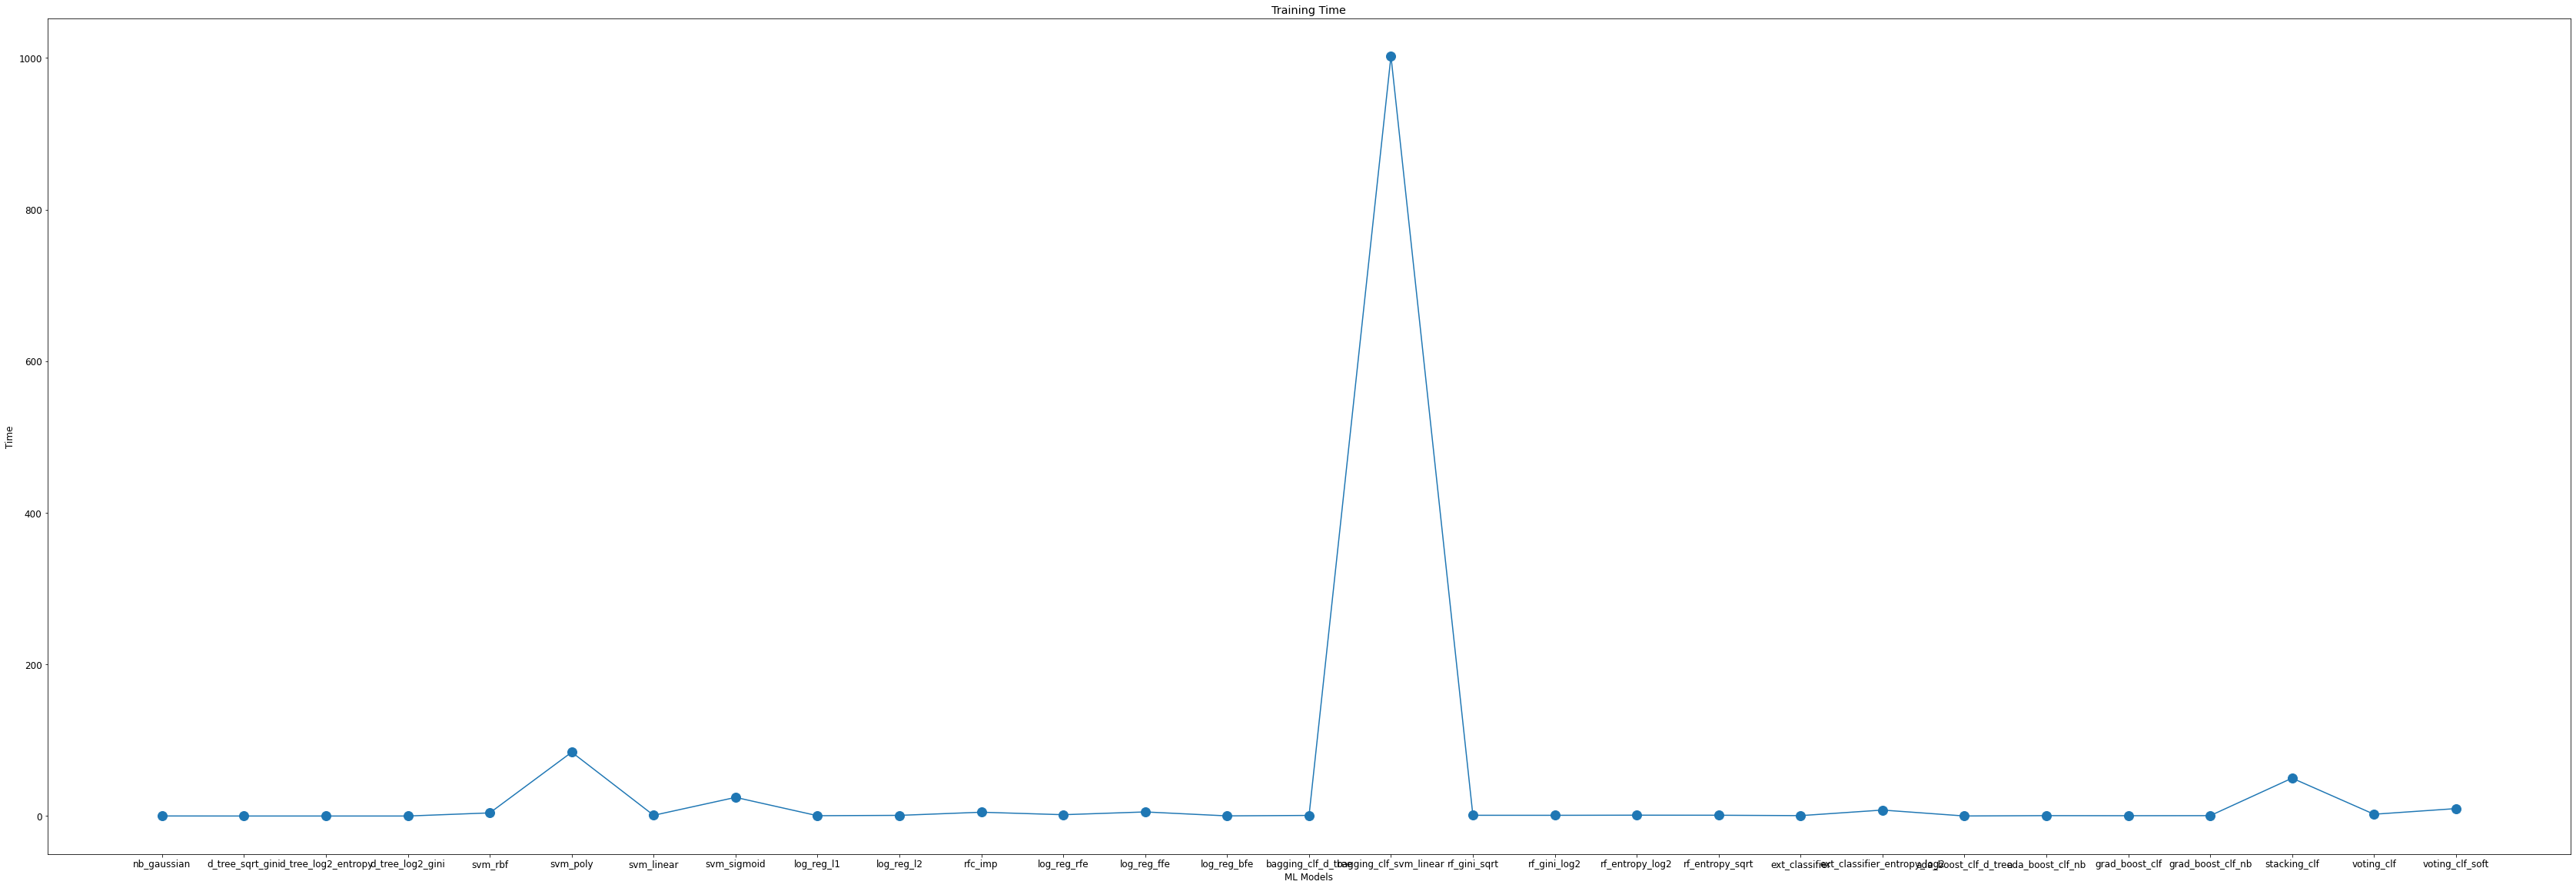

In [313]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Training Time')
plt.xlabel('ML Models')
plt.ylabel('Time')

plt.plot(dict_training_time.keys(), dict_training_time.values(),  marker='o',  markersize=12)

fig.savefig('train_time_line_graph.jpg',bbox_inches='tight')

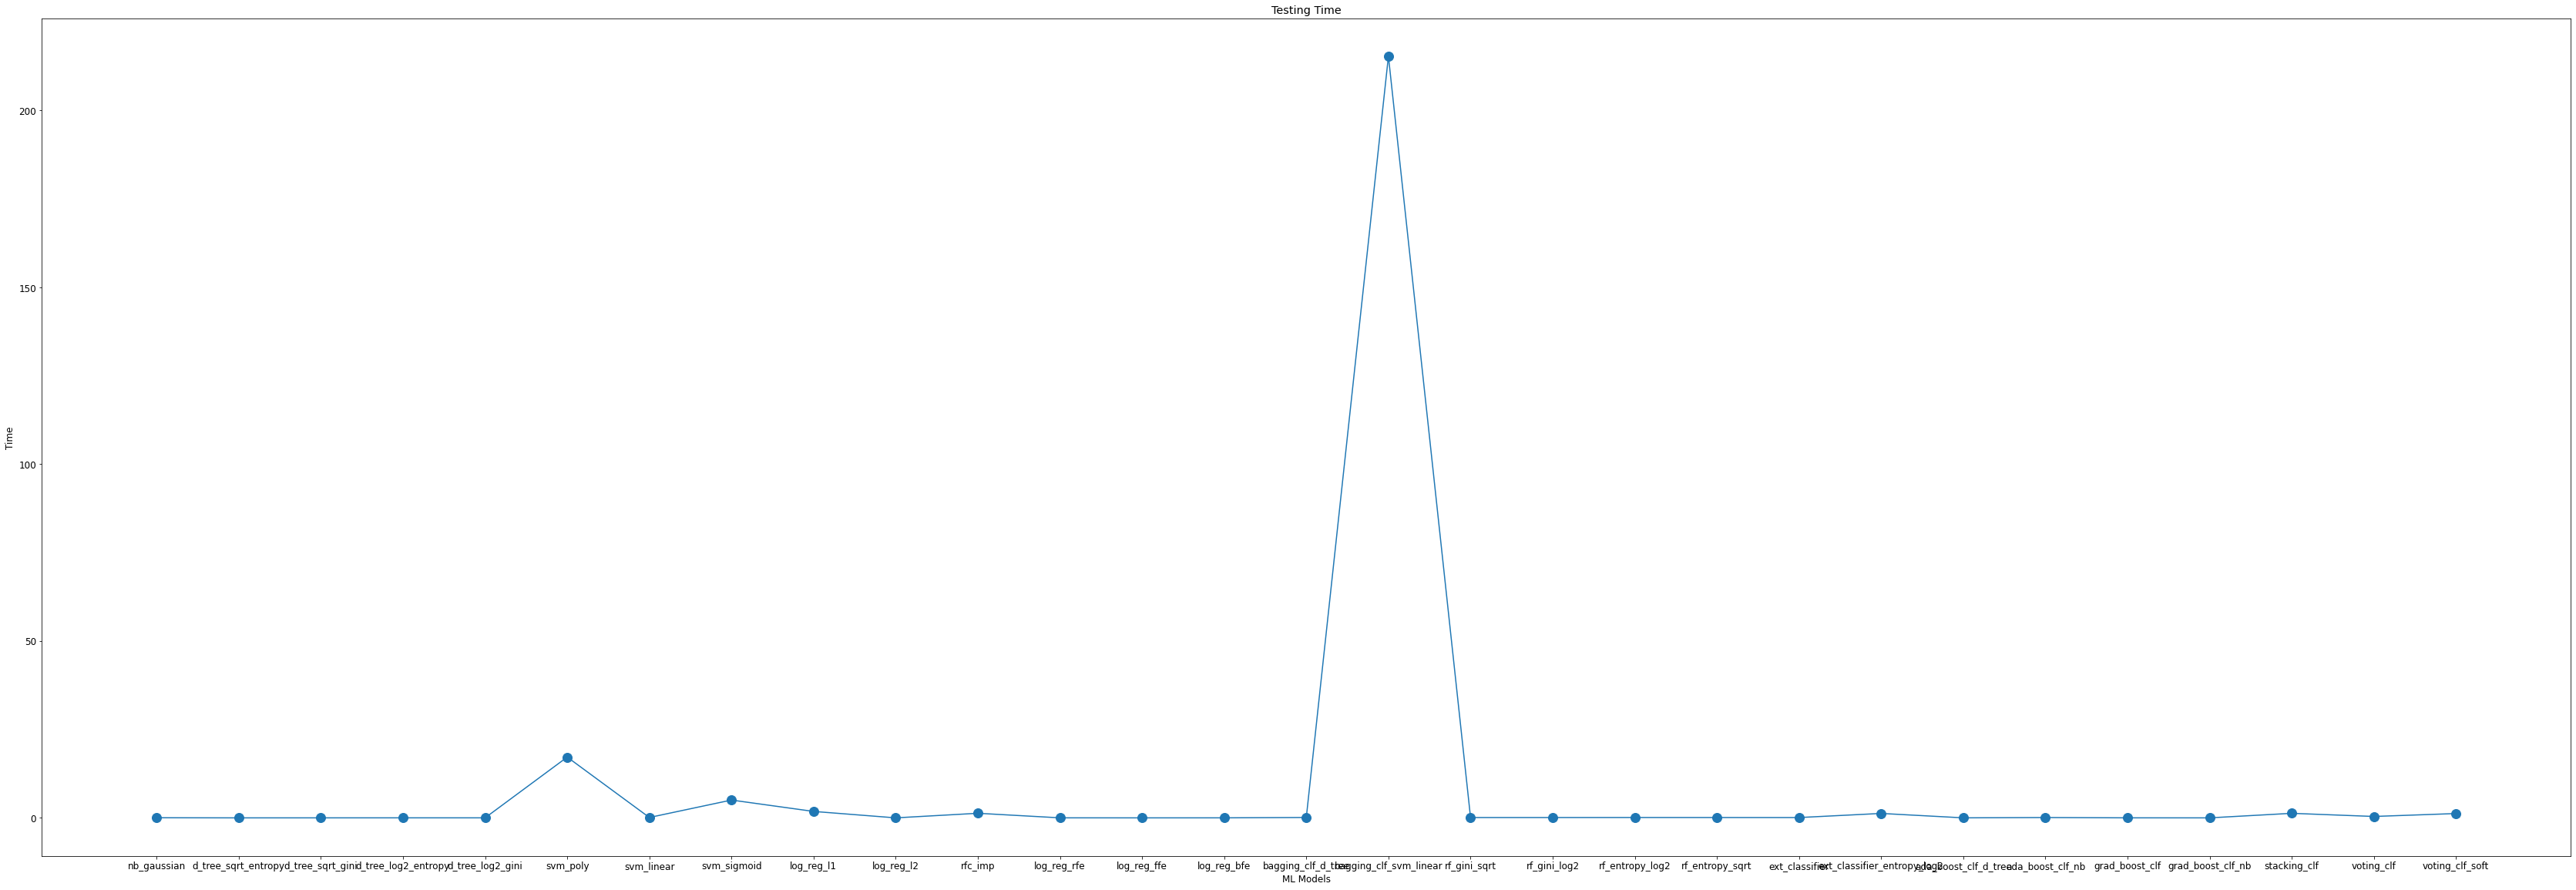

In [314]:
fig = plt.figure(figsize=(200,20))

plt.subplot(131)

plt.title('Testing Time')
plt.xlabel('ML Models')
plt.ylabel('Time')


plt.plot(dict_testing_time.keys(), dict_testing_time.values(), marker='o',  markersize=12)

fig.savefig('test_time_line_graph.jpg',bbox_inches='tight')

In [315]:
# training

d_trees = {
    "d_tree_log2_entropy": dict_training_accuracy["d_tree_log2_entropy"], 
    "d_tree_log2_gini": dict_training_accuracy["d_tree_log2_gini"], 
    "d_tree_sqrt_entropy": dict_training_accuracy["d_tree_sqrt_entropy"], 
#     "d_tree_sqrt_gini": dict_training_accuracy["d_tree_sqrt_gini"]
          }


svms = {
    "svm_linear": dict_training_accuracy["svm_linear"], 
    "svm_poly": dict_training_accuracy["svm_poly"], 
    "svm_rbf" : dict_training_accuracy["svm_rbf"], 
#     "svm_sigmoid" : dict_training_accuracy["svm_sigmoid"]
       }


rfs = {
    "rf_entropy_log2": dict_training_accuracy["rf_entropy_log2"], 
    "rf_entropy_sqrt":dict_training_accuracy["rf_entropy_sqrt"], 
    "rf_gini_log2": dict_training_accuracy["rf_gini_log2"], 
#     "rf_gini_sqrt": dict_training_accuracy["rf_gini_sqrt"], 
#     "rfc_imp": dict_training_accuracy["rfc_imp"] 
      }


log_regs = {
#     "log_reg": dict_training_accuracy["log_reg"],
    "log_reg_l1": dict_training_accuracy["log_reg_l1"],
    "log_reg_l2": dict_training_accuracy["log_reg_l2"],
    "log_reg_rfe": dict_training_accuracy["log_reg_rfe"],
#     "log_reg_ffe": dict_training_accuracy["log_reg_ffe"],
#     "log_reg_bfe": dict_training_accuracy["log_reg_bfe"],
       }


bagging = {
    "bagging_clf_d_tree": dict_training_accuracy["bagging_clf_d_tree"],
    "bagging_clf_svm_linear": dict_training_accuracy["bagging_clf_svm_linear"],
#     "rf_entropy_log2": dict_training_accuracy["rf_entropy_log2"], 
#     "rf_entropy_sqrt":dict_training_accuracy["rf_entropy_sqrt"], 
#     "rf_gini_log2": dict_training_accuracy["rf_gini_log2"], 
#     "rf_gini_sqrt": dict_training_accuracy["rf_gini_sqrt"], 
    "rfc_imp": dict_training_accuracy["rfc_imp"]
    }

ext_trees = {
    "ext_classifier": dict_training_accuracy["ext_classifier"],
    "ext_classifier_entropy_log2": dict_training_accuracy["ext_classifier_entropy_log2"],
    "rf_gini_sqrt": dict_training_accuracy["rf_gini_sqrt"], 
}

boosting = {
    "ada_boost_clf_d_tree" : dict_training_accuracy["ada_boost_clf_d_tree"] ,
    "ada_boost_clf_nb" : dict_training_accuracy["ada_boost_clf_nb"] ,
    "grad_boost_clf": dict_training_accuracy["grad_boost_clf"],
#     "grad_boost_clf_nb": dict_training_accuracy["grad_boost_clf_nb"],
}


ensembles = {
    "stacking_clf": dict_training_accuracy["stacking_clf"],
    "voting_clf": dict_training_accuracy["voting_clf"],
    "voting_clf_soft": dict_training_accuracy["voting_clf_soft"],  
}

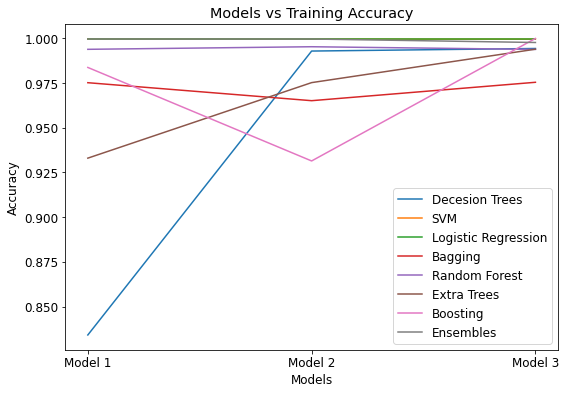

In [316]:
fig = plt.figure(figsize=(30,6))

plt.subplot(131)
plt.title("Models vs Training Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")


plt.plot(["Model 1", "Model 2", "Model 3" ], d_trees.values(), label="Decesion Trees")
plt.plot(["Model 1", "Model 2", "Model 3" ], svms.values(), label="SVM")
plt.plot(["Model 1", "Model 2", "Model 3" ], log_regs.values(), label="Logistic Regression")
plt.plot(["Model 1", "Model 2", "Model 3" ], bagging.values(), label="Bagging")
plt.plot(["Model 1", "Model 2", "Model 3" ], rfs.values(), label="Random Forest")
plt.plot(["Model 1", "Model 2", "Model 3" ], ext_trees.values(), label="Extra Trees")
plt.plot(["Model 1", "Model 2", "Model 3" ], boosting.values(), label="Boosting")
plt.plot(["Model 1", "Model 2", "Model 3" ], ensembles.values(), label="Ensembles")

plt.legend()
plt.show()

fig.savefig('train_multiple_line_graph.jpg',bbox_inches='tight')

In [317]:
# training

d_trees = {
    "d_tree_log2_entropy": dict_testing_accuracy["d_tree_log2_entropy"], 
    "d_tree_log2_gini": dict_testing_accuracy["d_tree_log2_gini"], 
    "d_tree_sqrt_entropy": dict_testing_accuracy["d_tree_sqrt_entropy"], 
#     "d_tree_sqrt_gini": dict_testing_accuracy["d_tree_sqrt_gini"]
          }


svms = {
    "svm_linear": dict_testing_accuracy["svm_linear"], 
    "svm_poly": dict_testing_accuracy["svm_poly"], 
    "svm_rbf" : dict_testing_accuracy["svm_rbf"], 
#     "svm_sigmoid" : dict_testing_accuracy["svm_sigmoid"]
       }


rfs = {
    "rf_entropy_log2": dict_testing_accuracy["rf_entropy_log2"], 
    "rf_entropy_sqrt":dict_testing_accuracy["rf_entropy_sqrt"], 
    "rf_gini_log2": dict_testing_accuracy["rf_gini_log2"], 
#     "rf_gini_sqrt": dict_testing_accuracy["rf_gini_sqrt"], 
#     "rfc_imp": dict_testing_accuracy["rfc_imp"] 
      }


log_regs = {
#     "log_reg": dict_testing_accuracy["log_reg"],
    "log_reg_l1": dict_testing_accuracy["log_reg_l1"],
    "log_reg_l2": dict_testing_accuracy["log_reg_l2"],
    "log_reg_rfe": dict_testing_accuracy["log_reg_rfe"],
#     "log_reg_ffe": dict_testing_accuracy["log_reg_ffe"],
#     "log_reg_bfe": dict_testing_accuracy["log_reg_bfe"],
       }


bagging = {
    "bagging_clf_d_tree": dict_testing_accuracy["bagging_clf_d_tree"],
    "bagging_clf_svm_linear": dict_testing_accuracy["bagging_clf_svm_linear"],
#     "rf_entropy_log2": dict_testing_accuracy["rf_entropy_log2"], 
#     "rf_entropy_sqrt":dict_testing_accuracy["rf_entropy_sqrt"], 
#     "rf_gini_log2": dict_testing_accuracy["rf_gini_log2"], 
#     "rf_gini_sqrt": dict_testing_accuracy["rf_gini_sqrt"], 
    "rfc_imp": dict_testing_accuracy["rfc_imp"]
    }

ext_trees = {
    "ext_classifier": dict_testing_accuracy["ext_classifier"],
    "ext_classifier_entropy_log2": dict_testing_accuracy["ext_classifier_entropy_log2"],
    "rf_gini_sqrt": dict_testing_accuracy["rf_gini_sqrt"], 
}

boosting = {
    "ada_boost_clf_d_tree" : dict_testing_accuracy["ada_boost_clf_d_tree"] ,
    "ada_boost_clf_nb" : dict_testing_accuracy["ada_boost_clf_nb"] ,
    "grad_boost_clf": dict_testing_accuracy["grad_boost_clf"],
#     "grad_boost_clf_nb": dict_testing_accuracy["grad_boost_clf_nb"],
}


ensembles = {
    "stacking_clf": dict_testing_accuracy["stacking_clf"],
    "voting_clf": dict_testing_accuracy["voting_clf"],
    "voting_clf_soft": dict_testing_accuracy["voting_clf_soft"],  
}


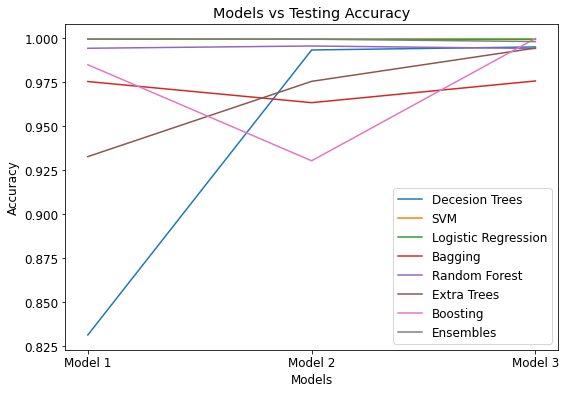

In [318]:
fig = plt.figure(figsize=(30,6))

plt.subplot(131)
plt.title("Models vs Testing Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")


plt.plot(["Model 1", "Model 2", "Model 3" ], d_trees.values(), label="Decesion Trees", )
plt.plot(["Model 1", "Model 2", "Model 3" ], svms.values(), label="SVM", )
plt.plot(["Model 1", "Model 2", "Model 3" ], log_regs.values(), label="Logistic Regression")
plt.plot(["Model 1", "Model 2", "Model 3" ], bagging.values(), label="Bagging")
plt.plot(["Model 1", "Model 2", "Model 3" ], rfs.values(), label="Random Forest")
plt.plot(["Model 1", "Model 2", "Model 3" ], ext_trees.values(), label="Extra Trees")
plt.plot(["Model 1", "Model 2", "Model 3" ], boosting.values(), label="Boosting")
plt.plot(["Model 1", "Model 2", "Model 3" ], ensembles.values(), label="Ensembles")

plt.legend()
plt.show()

fig.savefig('test_multiple_line_graph.jpg',bbox_inches='tight')

In [319]:
sorted(dict_training_accuracy.items(), key=lambda x: x[1], reverse=True)

[('grad_boost_clf', 0.9999075842523566),
 ('svm_linear', 0.999599531760212),
 ('log_reg_l1', 0.999599531760212),
 ('log_reg_l2', 0.999599531760212),
 ('log_reg_rfe', 0.999599531760212),
 ('log_reg_ffe', 0.999599531760212),
 ('stacking_clf', 0.999599531760212),
 ('voting_clf', 0.999599531760212),
 ('svm_rbf', 0.999537921261783),
 ('svm_poly', 0.999537921261783),
 ('voting_clf_soft', 0.9976588010597006),
 ('rf_entropy_sqrt', 0.9952867968701867),
 ('d_tree_sqrt_entropy', 0.9943010288953238),
 ('rf_gini_sqrt', 0.9939005606555357),
 ('rf_entropy_log2', 0.9938389501571068),
 ('rf_gini_log2', 0.9937927422832851),
 ('d_tree_log2_gini', 0.9928685848068511),
 ('ada_boost_clf_d_tree', 0.9837040231655474),
 ('nb_gaussian', 0.9755252294991067),
 ('rfc_imp', 0.9754020085022488),
 ('ext_classifier_entropy_log2', 0.975217177006962),
 ('bagging_clf_d_tree', 0.9751709691331403),
 ('d_tree_sqrt_gini', 0.9738925512907399),
 ('bagging_clf_svm_linear', 0.9651130552646171),
 ('ext_classifier', 0.932983180333

In [320]:
sorted(dict_testing_accuracy.items(), key=lambda x: x[1], reverse=True)

[('grad_boost_clf', 0.9998921832884097),
 ('svm_linear', 0.9994968553459119),
 ('log_reg_rfe', 0.9994968553459119),
 ('stacking_clf', 0.9994968553459119),
 ('voting_clf', 0.9994968553459119),
 ('log_reg_l1', 0.9994609164420485),
 ('log_reg_l2', 0.9994609164420485),
 ('log_reg_ffe', 0.9994609164420485),
 ('svm_rbf', 0.999424977538185),
 ('svm_poly', 0.999424977538185),
 ('voting_clf_soft', 0.9981311769991015),
 ('rf_entropy_sqrt', 0.9956154537286612),
 ('d_tree_sqrt_entropy', 0.9950763701707098),
 ('rf_gini_sqrt', 0.994429469901168),
 ('rf_entropy_log2', 0.9943216531895778),
 ('rf_gini_log2', 0.9942138364779874),
 ('d_tree_log2_gini', 0.9933513027852651),
 ('ada_boost_clf_d_tree', 0.9849775381850854),
 ('nb_gaussian', 0.9759928122192273),
 ('rfc_imp', 0.9757412398921833),
 ('ext_classifier_entropy_log2', 0.9755256064690027),
 ('bagging_clf_d_tree', 0.9754177897574124),
 ('d_tree_sqrt_gini', 0.9739802336028751),
 ('bagging_clf_svm_linear', 0.963414195867026),
 ('ext_classifier', 0.932758

In [321]:
best_train_accuracy = {}


best_train_accuracy["svm_linear"] = dict_training_accuracy["svm_linear"]
best_train_accuracy["d_tree_sqrt_entropy"] = dict_training_accuracy["d_tree_sqrt_entropy"]
best_train_accuracy["log_reg_rfe"] = dict_training_accuracy["log_reg_rfe"]
best_train_accuracy["rf_entropy_sqrt"] = dict_training_accuracy["rf_entropy_sqrt"]
best_train_accuracy["nb_gaussian"] = dict_training_accuracy["nb_gaussian"]
best_train_accuracy["grad_boost_clf"] = dict_training_accuracy["grad_boost_clf"]
best_train_accuracy["log_reg_l1"] = dict_training_accuracy["log_reg_l1"]
best_train_accuracy["voting_clf"] = dict_training_accuracy["voting_clf"]



# best_train_accuracy["ext_classifier_entropy_log2"] = dict_training_accuracy["ext_classifier_entropy_log2"]
# best_train_accuracy["grad_boost_clf"] = dict_training_accuracy["grad_boost_clf"]


# ## shuffling the pairs
# list1 =  list(best_train_accuracy.items())
# np.random.shuffle(list1)
# best_train_accuracy = dict(list1)

best_train_accuracy

{'svm_linear': 0.999599531760212,
 'd_tree_sqrt_entropy': 0.9943010288953238,
 'log_reg_rfe': 0.999599531760212,
 'rf_entropy_sqrt': 0.9952867968701867,
 'nb_gaussian': 0.9755252294991067,
 'grad_boost_clf': 0.9999075842523566,
 'log_reg_l1': 0.999599531760212,
 'voting_clf': 0.999599531760212}

In [322]:
best_test_accuracy = {}


best_test_accuracy["svm_linear"] = dict_testing_accuracy["svm_linear"]
best_test_accuracy["d_tree_sqrt_entropy"] = dict_testing_accuracy["d_tree_sqrt_entropy"]
best_test_accuracy["log_reg_rfe"] = dict_testing_accuracy["log_reg_rfe"]
best_test_accuracy["rf_entropy_sqrt"] = dict_testing_accuracy["rf_entropy_sqrt"]
best_test_accuracy["nb_gaussian"] = dict_testing_accuracy["nb_gaussian"]
best_test_accuracy["grad_boost_clf"] = dict_testing_accuracy["grad_boost_clf"]
best_test_accuracy["log_reg_l1"] = dict_testing_accuracy["log_reg_l1"]
best_test_accuracy["voting_clf"] = dict_testing_accuracy["voting_clf"]

# best_test_accuracy["ext_classifier_entropy_log2"] = dict_testing_accuracy["ext_classifier_entropy_log2"]
# best_test_accuracy["grad_boost_clf"] = dict_testing_accuracy["grad_boost_clf"]

## shuffling the pairs
# list1 =  list(best_test_accuracy.items())
# np.random.shuffle(list1)
# best_test_accuracy = dict(list1)

best_test_accuracy

{'svm_linear': 0.9994968553459119,
 'd_tree_sqrt_entropy': 0.9950763701707098,
 'log_reg_rfe': 0.9994968553459119,
 'rf_entropy_sqrt': 0.9956154537286612,
 'nb_gaussian': 0.9759928122192273,
 'grad_boost_clf': 0.9998921832884097,
 'log_reg_l1': 0.9994609164420485,
 'voting_clf': 0.9994968553459119}

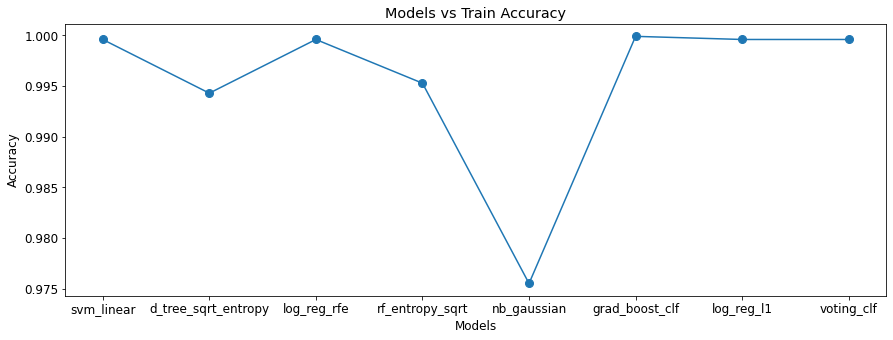

In [323]:

fig = plt.figure(figsize=(50,5))

plt.subplot(131)
plt.title("Models vs Train Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")


plt.plot(best_train_accuracy.keys(), best_train_accuracy.values(), marker='o',  markersize=8)
plt.show()

fig.savefig('best_train_accuracy_line_graph.jpg',bbox_inches='tight')


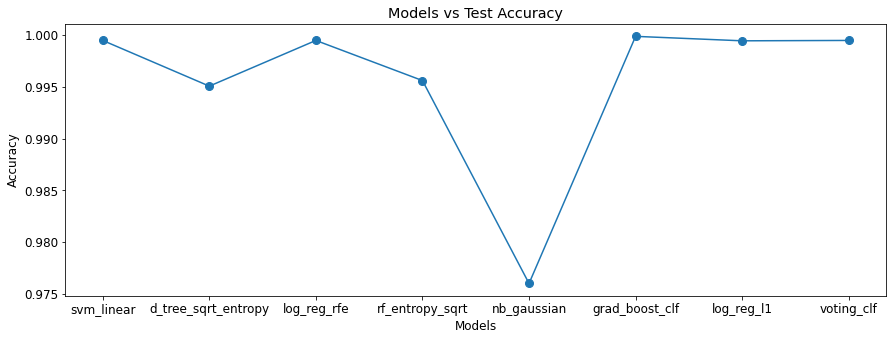

In [324]:

fig = plt.figure(figsize=(50,5))

plt.subplot(131)
plt.title("Models vs Test Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")


plt.plot(best_test_accuracy.keys(), best_test_accuracy.values(), marker='o',  markersize=8)
plt.show()

fig.savefig('best_test_accuracy_line_graph.jpg',bbox_inches='tight')


In [325]:
max_train_accuracy = max(dict_training_accuracy.keys(), key=(lambda k: dict_training_accuracy[k]))
max_test_accuracy = max(dict_testing_accuracy.keys(), key=(lambda k: dict_testing_accuracy[k]))

min_train_accuracy = min(dict_training_accuracy.keys(), key=(lambda k: dict_training_accuracy[k]))
min_test_accuracy = min(dict_testing_accuracy.keys(), key=(lambda k: dict_testing_accuracy[k]))

# 

max_train_time = max(dict_training_time.keys(), key=(lambda k: dict_training_time[k]))
max_test_time = max(dict_testing_time.keys(), key=(lambda k: dict_testing_time[k]))

min_train_time = min(dict_training_time.keys(), key=(lambda k: dict_training_time[k]))
min_test_time = min(dict_testing_time.keys(), key=(lambda k: dict_testing_time[k]))


In [326]:
print('Algorithm: ', max_train_accuracy,'\nMax Training Accuracy:', dict_training_accuracy[max_train_accuracy])

Algorithm:  grad_boost_clf 
Max Training Accuracy: 0.9999075842523566


In [327]:
print('Algorithm: ', max_test_accuracy,'\nMax Testing Accuracy:', dict_testing_accuracy[max_test_accuracy])

Algorithm:  grad_boost_clf 
Max Testing Accuracy: 0.9998921832884097


In [328]:
print('Algorithm: ', min_train_accuracy,'\nMin Training Accuracy:', dict_training_accuracy[min_train_accuracy])

Algorithm:  grad_boost_clf_nb 
Min Training Accuracy: 0.6846928716653318


In [329]:
print('Algorithm: ', min_test_accuracy,'\nMin Testing Accuracy:', dict_testing_accuracy[min_test_accuracy])

Algorithm:  grad_boost_clf_nb 
Min Testing Accuracy: 0.6883378256963163


In [330]:
print('Algorithm: ', max_train_time,'\nMax Training Time:', dict_training_time[max_train_time])

Algorithm:  bagging_clf_svm_linear 
Max Training Time: 1002.3666250705719


In [331]:
print('Algorithm: ', max_test_time,'\nMax Testing Time:', dict_testing_time[max_test_time])

Algorithm:  bagging_clf_svm_linear 
Max Testing Time: 215.3452603816986


In [332]:
print('Algorithm: ', min_train_time,'\nMin Training Time:', dict_training_time[min_train_time])

Algorithm:  d_tree_log2_entropy 
Min Training Time: 0.023984193801879883


In [333]:
print('Algorithm: ', min_test_time,'\nMin Testing Time:', dict_testing_time[min_test_time])

Algorithm:  d_tree_sqrt_entropy 
Min Testing Time: 0.0
